In [1]:
library(DESeq2)
library(ggplot2)
library(reshape2)
library(patchwork)
library(ggrepel)
library(cowplot)
library(grid)
library(RColorBrewer)
library(repr) 
library(glmpca)
library(pheatmap)
library(PoiClaClu)
library(apeglm)
library(ashr)
library(vsn)
library(dplyr)
library(tidyr)
library(viridis)  
library("pheatmap")
library("ReportingTools")
library("BiocParallel")
library(glmpca)
library(emdbook)  
library(tidyverse)
register(MulticoreParam(4))
library(sva)
library(RUVSeq)
library(GenomicRanges)
library(ChIPseeker)
library(TxDb.Hsapiens.UCSC.hg38.knownGene)
library(org.Hs.eg.db)
library(data.table)
library(biomaRt)
library(ensembldb)
library(AnnotationHub)
library(data.table)

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, saveRDS, setdiff,
    table, tapply, union, unique, unsplit, which.max, which.min



Attaching package: ‘S4Vectors’


The following object is masked from ‘package:utils’:

    findMatches


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: GenomicRanges

Loading required package: GenomeInfoDb



In [2]:
# Load count data
count_data <- read.csv("A2780_featureCounts.txt", 
                       skip = 1, sep="\t", header=TRUE, stringsAsFactors=FALSE)  

head(count_data,2 )

# Remove the ".genomicAllAligned.sorted.bam" suffix from column names
colnames(count_data) <- sub("\\.CLAM.genomicAllAligned\\.sorted\\.bam$", "", colnames(count_data))
head(count_data, 2)
colnames(count_data)

colnames(count_data) <- sub("^([^\\.]+)\\..*", "\\1", colnames(count_data))
head(count_data, 2)
colnames(count_data, 2)

Geneid           
1 ENSG00000290825.2
2 ENSG00000223972.6
  Chr                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
1 chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1
2 chr1;chr1;chr1;chr1;chr1;chr1                                                                                                                                                                                                                                                                                                                                                                                                                                                             
  Start                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
1 11121;11125;11410;11411;11426;11770;11819;11823;11824;11824;11824;11824;11825;11828;11845;11847;11847;11847;11850;11850;11854;11854;11854;11883;11883;12010;12010;12010;12010;12010;12010;12010;12010;12010;12010;12010;12010;12010;12010;12259;12497;12524;12595;12595;12595;12595;12595;12613;12613;12613;12613;12613;12613;12613;12613;12613;12613;12613;12613;12613;12613;12613;12613;12613;12646;12646;13221;13221;13221;13403;13403;13403;13403;13453;13453;13453;13453;13483;13483;13483;13483;13483;13483;13483;13483;13483;13483;13483;13483;13487;13487;13487;13565;14404;24846
2 12010;12179;12613;12975;13221;13453                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
  End                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
1 11211;11211;11671;11671;11671;11844;11844;11844;11844;11844;11844;11844;11844;11844;12227;12227;12227;12227;12227;12227;12227;12227;12227;12227;12227;12227;12227;12227;12227;12227;12697;12227;12227;12227;12227;12227;12227

Geneid           
1 ENSG00000290825.2
2 ENSG00000223972.6
  Chr                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
1 chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1
2 chr1;chr1;chr1;chr1;chr1;chr1                                                                                                                                                                                                                                                                                                                                                                                                                                                             
  Start                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
1 11121;11125;11410;11411;11426;11770;11819;11823;11824;11824;11824;11824;11825;11828;11845;11847;11847;11847;11850;11850;11854;11854;11854;11883;11883;12010;12010;12010;12010;12010;12010;12010;12010;12010;12010;12010;12010;12010;12010;12259;12497;12524;12595;12595;12595;12595;12595;12613;12613;12613;12613;12613;12613;12613;12613;12613;12613;12613;12613;12613;12613;12613;12613;12613;12646;12646;13221;13221;13221;13403;13403;13403;13403;13453;13453;13453;13453;13483;13483;13483;13483;13483;13483;13483;13483;13483;13483;13483;13483;13487;13487;13487;13565;14404;24846
2 12010;12179;12613;12975;13221;13453                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
  End                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
1 11211;11211;11671;11671;11671;11844;11844;11844;11844;11844;11844;11844;11844;11844;12227;12227;12227;12227;12227;12227;12227;12227;12227;12227;12227;12227;12227;12227;12227;12227;12697;12227;12227;12227;12227;12227;12227

[1] "Geneid"              "Chr"                 "Start"              
 [4] "End"                 "Strand"              "Length"             
 [7] "CS13_1.CS13_1"       "CS13_1in.CS13_1in"   "CS13_2.CS13_2"      
[10] "CS13_2in.CS13_2in"   "DC13_1.DC13_1"       "DC13_1in.DC13_1in"  
[13] "DC13_2.DC13_2"       "DC13_2in.DC13_2in"   "pla13_1.pla13_1"    
[16] "pla13_1in.pla13_1in" "pla13_2.pla13_2"     "pla13_2in.pla13_2in"

Geneid           
1 ENSG00000290825.2
2 ENSG00000223972.6
  Chr                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
1 chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1
2 chr1;chr1;chr1;chr1;chr1;chr1                                                                                                                                                                                                                                                                                                                                                                                                                                                             
  Start                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
1 11121;11125;11410;11411;11426;11770;11819;11823;11824;11824;11824;11824;11825;11828;11845;11847;11847;11847;11850;11850;11854;11854;11854;11883;11883;12010;12010;12010;12010;12010;12010;12010;12010;12010;12010;12010;12010;12010;12010;12259;12497;12524;12595;12595;12595;12595;12595;12613;12613;12613;12613;12613;12613;12613;12613;12613;12613;12613;12613;12613;12613;12613;12613;12613;12646;12646;13221;13221;13221;13403;13403;13403;13403;13453;13453;13453;13453;13483;13483;13483;13483;13483;13483;13483;13483;13483;13483;13483;13483;13487;13487;13487;13565;14404;24846
2 12010;12179;12613;12975;13221;13453                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
  End                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
1 11211;11211;11671;11671;11671;11844;11844;11844;11844;11844;11844;11844;11844;11844;12227;12227;12227;12227;12227;12227;12227;12227;12227;12227;12227;12227;12227;12227;12227;12227;12697;12227;12227;12227;12227;12227;12227

[1] "Geneid"    "Chr"       "Start"     "End"       "Strand"    "Length"   
 [7] "CS13_1"    "CS13_1in"  "CS13_2"    "CS13_2in"  "DC13_1"    "DC13_1in" 
[13] "DC13_2"    "DC13_2in"  "pla13_1"   "pla13_1in" "pla13_2"   "pla13_2in"

In [3]:
count_data2 <- count_data %>%
  mutate(
    Chr = sapply(strsplit(Chr, ";"), `[`, 1),
    Start = sapply(strsplit(Start, ";"), function(x) min(as.integer(x))),
    End = sapply(strsplit(End, ";"), function(x) max(as.integer(x)))
  )

colnames(count_data2)
head(count_data2, 2)  

[1] "Geneid"    "Chr"       "Start"     "End"       "Strand"    "Length"   
 [7] "CS13_1"    "CS13_1in"  "CS13_2"    "CS13_2in"  "DC13_1"    "DC13_1in" 
[13] "DC13_2"    "DC13_2in"  "pla13_1"   "pla13_1in" "pla13_2"   "pla13_2in"

Geneid            Chr  Start End  
1 ENSG00000290825.2 chr1 11121 24894
2 ENSG00000223972.6 chr1 12010 13670
  Strand                                                                                                                                                                                       
1 +;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+
2 +;+;+;+;+;+                                                                                                                                                                                  
  Length CS13_1 CS13_1in CS13_2 CS13_2in DC13_1 DC13_1in DC13_2 DC13_2in
1 2898   3      0        3      3        6      4        0      3       
2  632   0      0        0      0        0      0        0      0       
  pla13_1 pla13_1in pla13_2 pla13_2in
1 1       4         2       5        
2 0       0         1       0

In [4]:
colnames(count_data2)
count_data2[4:10, ]  

[1] "Geneid"    "Chr"       "Start"     "End"       "Strand"    "Length"   
 [7] "CS13_1"    "CS13_1in"  "CS13_2"    "CS13_2in"  "DC13_1"    "DC13_1in" 
[13] "DC13_2"    "DC13_2in"  "pla13_1"   "pla13_1in" "pla13_2"   "pla13_2in"

Geneid            Chr  Start End  
4  ENSG00000227232.6 chr1 14696 24886
5  ENSG00000278267.1 chr1 17369 17436
6  ENSG00000243485.6 chr1 28589 31109
7  ENSG00000284332.1 chr1 30366 30503
8  ENSG00000237613.3 chr1 34553 37595
9  ENSG00000308361.1 chr1 36526 40778
10 ENSG00000290826.2 chr1 51891 64116
   Strand                                      Length CS13_1 CS13_1in CS13_2
4  -;-;-;-;-;-;-;-;-;-                         1380   0      0        0     
5  -                                             68   0      0        0     
6  +;+;+;+;+;+;+;+;+;+                         1743   1      1        0     
7  +                                            138   0      0        0     
8  -;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;- 1743   0      0        0     
9  +;+                                          319   0      2        0     
10 +;+;+;+;+;+;+                               1609   0      0        0     
   CS13_2in DC13_1 DC13_1in DC13_2 DC13_2in pla13_1 pla13_1in pla13_2 pla13_2in
4  0        0      0        0      0        0       0         0       0        
5  0        0      0        0      0        0       0         0       0        
6  0        3      4        0      4        0       5         3       6        
7  0        0      0        0      0        0       0         0       0        
8  0        0      0        0      0        0       0         0       0        
9  0        0      0        1      2        7       3         4       2        
10 0        0      0        0      0        0       0         0       0

In [5]:
# 1. Connect to AnnotationHub
ah <- AnnotationHub()

# 2. Search for Homo sCS13iens EnsDb annotation databases
query(ah, c("Homo sapiens", "EnsDb"))

# 3. Pick an CS13propriate version (e.g., v105 for Ensembl 105)
#    Adjust "AH107527" to the correct ID for your dataset
edb <- ah[["AH119325"]]  # EnsDb.HsCS13iens.v105 (example)

# 4. Load your data and strip version numbers
setDT(count_data2)
count_data2[, Geneid2 := gsub("\\..*", "", Geneid)]

# 5. Retrieve mCS13ping from Ensembl IDs to gene symbols
gene_info <- genes(edb, columns = c("gene_id", "gene_name"))
gene_info_dt <- as.data.table(as.data.frame(gene_info)[, c("gene_id", "gene_name")])

# 6. Rename columns to match for merge
setnames(gene_info_dt, c("gene_id", "gene_name"), c("Geneid2", "Symbol"))

# 7. Merge with your data
count_data2 <- merge(count_data2, gene_info_dt, by = "Geneid2", all.x = TRUE)

dim(count_data2)
count_data2[1:5, ] 

print("how many symbols are NA")
# Count how many symbols are NA
table(is.na(count_data2$Symbol))

print("how many symbols are duplicated")
# Count how many symbols are duplicated
sum(duplicated(count_data2$Symbol))

AnnotationHub with 28 records
# snapshotDate(): 2024-10-28
# $dataprovider: Ensembl
# $species: Homo sapiens
# $rdataclass: EnsDb
# additional mcols(): taxonomyid, genome, description,
#   coordinate_1_based, maintainer, rdatadateadded, preparerclass, tags,
#   rdatapath, sourceurl, sourcetype 
# retrieve records with, e.g., 'object[["AH53211"]]' 

             title                             
  AH53211  | Ensembl 87 EnsDb for Homo Sapiens 
  AH53715  | Ensembl 88 EnsDb for Homo Sapiens 
  AH56681  | Ensembl 89 EnsDb for Homo Sapiens 
  AH57757  | Ensembl 90 EnsDb for Homo Sapiens 
  AH60773  | Ensembl 91 EnsDb for Homo Sapiens 
  ...        ...                               
  AH109606 | Ensembl 109 EnsDb for Homo sapiens
  AH113665 | Ensembl 110 EnsDb for Homo sapiens
  AH116291 | Ensembl 111 EnsDb for Homo sapiens
  AH116860 | Ensembl 112 EnsDb for Homo sapiens
  AH119325 | Ensembl 113 EnsDb for Homo sapiens

loading from cache

Warning message in valid.GenomicRanges.seqinfo(x, suggest.trim = TRUE):
"GRanges object contains 1 out-of-bound range located on sequence
  LRG_432. Note that ranges located on a sequence whose length is unknown
  (NA) or on a circular sequence are not considered out-of-bound (use
  seqlengths() and isCircular() to get the lengths and circularity flags
  of the underlying sequences). You can use trim() to trim these ranges.
  See ?`trim,GenomicRanges-method` for more information."


[1] 78724    20

Geneid2         Geneid             Chr   Start     End      
1 ENSG00000000003 ENSG00000000003.16 chrX  100627108 100639991
2 ENSG00000000005 ENSG00000000005.6  chrX  100584936 100599885
3 ENSG00000000419 ENSG00000000419.14 chr20  50934867  50959140
4 ENSG00000000457 ENSG00000000457.14 chr1  169849631 169894267
5 ENSG00000000460 ENSG00000000460.17 chr1  169662007 169854080
  Strand                                                                                                                                                                                                                                                                                                       
1 -;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-                                                                                                                                                                                                                                                        
2 +;+;+;+;+;+;+;+;+;+                                                                                                                                                                                                                                                                                          
3 -;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-                                                                                    
4 -;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-                                                                                                                                                                                
5 +;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+
  Length CS13_1 CS13_1in CS13_2 CS13_2in DC13_1 DC13_1in DC13_2 DC13_2in
1 4530   653    690      547    412      646    541      592    600     
2 1476     2      2        0      7        2      5        4      5     
3 9276   464    578      465    342      370    420      363    411     
4 6883   220    249      143    200      165    269      270    357     
5 5970   257    324      254    225      292    427      415    460     
  pla13_1 pla13_1in pla13_2 pla13_2in Symbol
1 400     648       624      727      TSPAN6
2   3       5        14        8      TNMD  
3 418     735       791     1004      DPM1  
4 104     337       282      439      SCYL3 
5 200     482       329      560      FIRRM

[1] "how many symbols are NA"



FALSE 
78724 

[1] "how many symbols are duplicated"


[1] 37606

In [6]:
# retrieving the names of the genes by using mCS13Ids
# cound_data3 = count_data2

# Step 1: Remove version numbers from Ensembl Gene IDs
# count_data3$Geneid3 <- gsub("\\..*", "", count_data3$Geneid)
# dim(count_data3)

# Step 2: MCS13 to gene symbols
# gene_symbols <- mCS13Ids(
#  org.Hs.eg.db,
#  keys = count_data3$Geneid3,
#  column = "SYMBOL",
#  keytype = "ENSEMBL",
#  multiVals = "first"
# )

# length(gene_symbols)

# Step 3: Add gene symbols as a new column
# count_data3$Symbol3 <- gene_symbols
# count_data3[4:10, ]
# sum(is.na(count_data3$Symbol3))

colnames(count_data2)

[1] "Geneid2"   "Geneid"    "Chr"       "Start"     "End"       "Strand"   
 [7] "Length"    "CS13_1"    "CS13_1in"  "CS13_2"    "CS13_2in"  "DC13_1"   
[13] "DC13_1in"  "DC13_2"    "DC13_2in"  "pla13_1"   "pla13_1in" "pla13_2"  
[19] "pla13_2in" "Symbol"

In [7]:
# preparing a bDC13kup copy : count_data4
count_data4 = count_data2

# Connect to Ensembl
mart <- useMart("ensembl", dataset = "hsapiens_gene_ensembl")

# Query for gene symbols
gene_mart <- getBM(
  attributes = c("ensembl_gene_id", "external_gene_name"),
  filters = "ensembl_gene_id",
  values = count_data4$Geneid2,
  mart = mart
)

dim(gene_mart)

# Convert to data.table for fast merge
gene_mart <- as.data.table(gene_mart)

# Rename for clarity (optional)
setnames(gene_mart, c("ensembl_gene_id", "external_gene_name"), c("Geneid2", "Symbol"))

# Merge bDC13k into your original data : all.x = TRUE
count_data4 <- merge(count_data4, gene_mart, by = "Geneid2", all.x = TRUE)

count_data4[4:10, ]
dim(count_data4)

[1] 78724     2

Geneid2         Geneid             Chr  Start     End      
1 ENSG00000000457 ENSG00000000457.14 chr1 169849631 169894267
2 ENSG00000000460 ENSG00000000460.17 chr1 169662007 169854080
3 ENSG00000000938 ENSG00000000938.13 chr1  27612064  27635185
4 ENSG00000000971 ENSG00000000971.17 chr1 196651754 196752476
5 ENSG00000001036 ENSG00000001036.14 chr6 143494812 143511720
6 ENSG00000001084 ENSG00000001084.13 chr6  53497341  53616970
7 ENSG00000001167 ENSG00000001167.15 chr6  41072974  41102403
  Strand                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
1 -;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
2 +;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

[1] 78724    21

In [8]:
count_data2[4:6, ]
count_data4[4:6, ]

dim(count_data2)
dim(count_data4)

Geneid2         Geneid             Chr  Start     End      
1 ENSG00000000457 ENSG00000000457.14 chr1 169849631 169894267
2 ENSG00000000460 ENSG00000000460.17 chr1 169662007 169854080
3 ENSG00000000938 ENSG00000000938.13 chr1  27612064  27635185
  Strand                                                                                                                                                                                                                                                                                                       
1 -;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-                                                                                                                                                                                
2 +;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+
3 -;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-                                                                                                                                                                            
  Length CS13_1 CS13_1in CS13_2 CS13_2in DC13_1 DC13_1in DC13_2 DC13_2in
1 6883   220    249      143    200      165    269      270    357     
2 5970   257    324      254    225      292    427      415    460     
3 3382     2      1        0      0        0      0        0      0     
  pla13_1 pla13_1in pla13_2 pla13_2in Symbol
1 104     337       282     439       SCYL3 
2 200     482       329     560       FIRRM 
3   0       0         3       0       FGR

Geneid2         Geneid             Chr  Start     End      
1 ENSG00000000457 ENSG00000000457.14 chr1 169849631 169894267
2 ENSG00000000460 ENSG00000000460.17 chr1 169662007 169854080
3 ENSG00000000938 ENSG00000000938.13 chr1  27612064  27635185
  Strand                                                                                                                                                                                                                                                                                                       
1 -;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-                                                                                                                                                                                
2 +;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+
3 -;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-                                                                                                                                                                            
  Length CS13_1 CS13_1in CS13_2 ⋯ DC13_1 DC13_1in DC13_2 DC13_2in pla13_1
1 6883   220    249      143    ⋯ 165    269      270    357      104    
2 5970   257    324      254    ⋯ 292    427      415    460      200    
3 3382     2      1        0    ⋯   0      0        0      0        0    
  pla13_1in pla13_2 pla13_2in Symbol.x Symbol.y
1 337       282     439       SCYL3    SCYL3   
2 482       329     560       FIRRM    FIRRM   
3   0         3       0       FGR      FGR

[1] 78724    20

[1] 78724    21

In [9]:
# to keep only one entry per gene

count_data5 = count_data2
dim(count_data5)

# Filter out rows with NA in Symbol
symbols_no_na <- count_data5[!is.na(Symbol), Symbol]
# Count how many symbols are duplicated
print("how many unique gene symbols are duplicated:")
sum(duplicated(symbols_no_na))

# Remove rows where Symbol is NA
count_data5c <- count_data5[!is.na(Symbol), ]

# Keep only the first occurrence of eDC13h Symbol
count_data5u <- count_data5c[!duplicated(count_data5c$Symbol), ]

# Should be FALSE if no duplicated symbols remain
any(duplicated(count_data5u$Symbol))

print("how many unique gene symbols we work with:")
dim(count_data5u)[1]

head(count_data5u, 3)
colnames(count_data5u)

count_data6 = count_data5u %>%
                           dplyr::select(Symbol, starts_with("CS13"), starts_with("DC13"), starts_with("pla13")) %>%
                           rename(Geneid = Symbol)


head(count_data6, 3)
colnames(count_data6)

[1] 78724    20

[1] "how many unique gene symbols are duplicated:"


[1] 37606

[1] FALSE

[1] "how many unique gene symbols we work with:"


[1] 41118

Geneid2         Geneid             Chr   Start     End      
1 ENSG00000000003 ENSG00000000003.16 chrX  100627108 100639991
2 ENSG00000000005 ENSG00000000005.6  chrX  100584936 100599885
3 ENSG00000000419 ENSG00000000419.14 chr20  50934867  50959140
  Strand                                                                                                                                                                                                                   
1 -;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-                                                                                                                                                                    
2 +;+;+;+;+;+;+;+;+;+                                                                                                                                                                                                      
3 -;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-
  Length CS13_1 CS13_1in CS13_2 CS13_2in DC13_1 DC13_1in DC13_2 DC13_2in
1 4530   653    690      547    412      646    541      592    600     
2 1476     2      2        0      7        2      5        4      5     
3 9276   464    578      465    342      370    420      363    411     
  pla13_1 pla13_1in pla13_2 pla13_2in Symbol
1 400     648       624      727      TSPAN6
2   3       5        14        8      TNMD  
3 418     735       791     1004      DPM1

[1] "Geneid2"   "Geneid"    "Chr"       "Start"     "End"       "Strand"   
 [7] "Length"    "CS13_1"    "CS13_1in"  "CS13_2"    "CS13_2in"  "DC13_1"   
[13] "DC13_1in"  "DC13_2"    "DC13_2in"  "pla13_1"   "pla13_1in" "pla13_2"  
[19] "pla13_2in" "Symbol"

Geneid CS13_1 CS13_1in CS13_2 CS13_2in DC13_1 DC13_1in DC13_2 DC13_2in
1 TSPAN6 653    690      547    412      646    541      592    600     
2 TNMD     2      2        0      7        2      5        4      5     
3 DPM1   464    578      465    342      370    420      363    411     
  pla13_1 pla13_1in pla13_2 pla13_2in
1 400     648       624      727     
2   3       5        14        8     
3 418     735       791     1004

[1] "Geneid"    "CS13_1"    "CS13_1in"  "CS13_2"    "CS13_2in"  "DC13_1"   
 [7] "DC13_1in"  "DC13_2"    "DC13_2in"  "pla13_1"   "pla13_1in" "pla13_2"  
[13] "pla13_2in"

In [10]:
colnames(count_data6)

sample_cols <- colnames(count_data6)[2:ncol(count_data6)] 

# Now separate based on names ending in "in"
in_cols    <- grep("in$", sample_cols, value = TRUE)
no_in_cols <- grep("in$", sample_cols, value = TRUE, invert = TRUE)

sample_cols
in_cols
no_in_cols

head(count_data6, 2)

[1] "Geneid"    "CS13_1"    "CS13_1in"  "CS13_2"    "CS13_2in"  "DC13_1"   
 [7] "DC13_1in"  "DC13_2"    "DC13_2in"  "pla13_1"   "pla13_1in" "pla13_2"  
[13] "pla13_2in"

[1] "CS13_1"    "CS13_1in"  "CS13_2"    "CS13_2in"  "DC13_1"    "DC13_1in" 
 [7] "DC13_2"    "DC13_2in"  "pla13_1"   "pla13_1in" "pla13_2"   "pla13_2in"

[1] "CS13_1in"  "CS13_2in"  "DC13_1in"  "DC13_2in"  "pla13_1in" "pla13_2in"

[1] "CS13_1"  "CS13_2"  "DC13_1"  "DC13_2"  "pla13_1" "pla13_2"

Geneid CS13_1 CS13_1in CS13_2 CS13_2in DC13_1 DC13_1in DC13_2 DC13_2in
1 TSPAN6 653    690      547    412      646    541      592    600     
2 TNMD     2      2        0      7        2      5        4      5     
  pla13_1 pla13_1in pla13_2 pla13_2in
1 400     648       624     727      
2   3       5        14       8

In [11]:
# Select _IP columns + Geneid
# ip <- count_data2 %>% dplyr::select(Geneid, ends_with("_IP"))
# head(ip, 2)

# Select _NP columns + Geneid
# np <- count_data2 %>% dplyr::select(Geneid, ends_with("_NP"))
# head(np, 2)

In [12]:
print("DESeq2 to measure the differential binding DC13ross IN (RNA-seq) samples :")
print("For consistency with the remaining part of the script, we use the data frame called ip,
       although we extract nopn.ip (aka RNA-seq) samples")

[1] "DESeq2 to measure the differential binding DC13ross IN (RNA-seq) samples :"
[1] "For consistency with the remaining part of the script, we use the data frame called ip,\n       although we extract nopn.ip (aka RNA-seq) samples"


In [13]:
sample_cols

[1] "CS13_1"    "CS13_1in"  "CS13_2"    "CS13_2in"  "DC13_1"    "DC13_1in" 
 [7] "DC13_2"    "DC13_2in"  "pla13_1"   "pla13_1in" "pla13_2"   "pla13_2in"

In [14]:
print("!!!")

[1] "!!!"


In [15]:
print("work with expression profiles in IP samples : 'CS13_1' 'CS13_2' 'DC13_1' 'DC13_2' 'pla13_1' 'pla13_2'")

[1] "work with expression profiles in IP samples : 'CS13_1' 'CS13_2' 'DC13_1' 'DC13_2' 'pla13_1' 'pla13_2'"


In [16]:
print("!!!")

[1] "!!!"


In [17]:
# This is by design — data.table extends data.frame in R, so every data.table is also a data.frame, 
# but with additional features (faster, more memory-efficient, better syntax for large data).

count_data6 <- as.data.frame(count_data6) 

# ip <- count_data6 %>% 
#                   dplyr::select(Geneid, ends_with("_in"))

# ExtrDC13t columns whose names DO NOT end with "in"
# in_cols    <- grep("in$", sample_cols, value = TRUE)
# no_in_cols <- grep("in$", sample_cols, value = TRUE, invert = TRUE)

sample_cols
in_cols
no_in_cols

# Optionally include Geneid as well
cols_to_keep <- c("Geneid", no_in_cols)

# Subset the data frame
ip <- count_data6[, cols_to_keep]

# Check results
head(ip)

[1] "CS13_1"    "CS13_1in"  "CS13_2"    "CS13_2in"  "DC13_1"    "DC13_1in" 
 [7] "DC13_2"    "DC13_2in"  "pla13_1"   "pla13_1in" "pla13_2"   "pla13_2in"

[1] "CS13_1in"  "CS13_2in"  "DC13_1in"  "DC13_2in"  "pla13_1in" "pla13_2in"

[1] "CS13_1"  "CS13_2"  "DC13_1"  "DC13_2"  "pla13_1" "pla13_2"

Geneid CS13_1 CS13_2 DC13_1 DC13_2 pla13_1 pla13_2
1 TSPAN6 653    547    646    592    400     624    
2 TNMD     2      0      2      4      3      14    
3 DPM1   464    465    370    363    418     791    
4 SCYL3  220    143    165    270    104     282    
5 FIRRM  257    254    292    415    200     329    
6 FGR      2      0      0      0      0       3

In [18]:
# Step 2: Set Geneid as rownames and remove Geneid column
rownames(ip) <- ip$Geneid
ip <- ip[, -1]

# Step 3: Verify column names
sample_names <- colnames(ip)
print(sample_names)

# Step 4: Assign condition groups (DC13, CS13, pla13)
conditions <- ifelse(grepl("^CS13", sample_names), "CS13",
              ifelse(grepl("^DC13", sample_names), "DC13",
              ifelse(grepl("^pla13", sample_names), "pla13", NA)))
print(conditions)

# Step 5: Error handling if any unrecognized sample names
if (any(is.na(conditions))) {
  stop("Some sample names do not match expected patterns (CS13, DC13, pla13). Check column names!")
}

# Step 6: Create colData
col_data <- data.frame(
  row.names = sample_names,
  condition = factor(conditions, levels = c("CS13", "DC13", "pla13"))
)
print("col data:")
print(col_data)

# Step 7: Remove rows with NA values
dim(ip)
ip <- ip[complete.cases(ip), ]
dim(ip)

# Step 8: Compute summary statistics directly on ip (only numeric columns)
summary_stats <- data.frame(
  Median = apply(ip, 2, median, na.rm = TRUE),
  Min    = apply(ip, 2, min, na.rm = TRUE),
  Max    = apply(ip, 2, max, na.rm = TRUE)
)

# Step 9: Print the result
print(summary_stats)

[1] "CS13_1"  "CS13_2"  "DC13_1"  "DC13_2"  "pla13_1" "pla13_2"
[1] "CS13"  "CS13"  "DC13"  "DC13"  "pla13" "pla13"
[1] "col data:"
        condition
CS13_1       CS13
CS13_2       CS13
DC13_1       DC13
DC13_2       DC13
pla13_1     pla13
pla13_2     pla13


[1] 41118     6

[1] 41118     6

        Median Min     Max
CS13_1       0   0  746637
CS13_2       0   0  690648
DC13_1       1   0  969708
DC13_2       1   0  741582
pla13_1      1   0  896335
pla13_2      2   0 1142495


In [19]:
# Step 10: Check again for duplicate gene IDs
dup_geneids <- duplicated(rownames(ip))

if (any(dup_geneids)) {
  cat("⚠️ Found", sum(dup_geneids), "duplicate gene IDs!\n")
  print(rownames(ip)[dup_geneids])
} else {
  cat("✅ No duplicate gene IDs found.\n")
}

head(ip)

✅ No duplicate gene IDs found.


CS13_1 CS13_2 DC13_1 DC13_2 pla13_1 pla13_2
TSPAN6 653    547    646    592    400     624    
TNMD     2      0      2      4      3      14    
DPM1   464    465    370    363    418     791    
SCYL3  220    143    165    270    104     282    
FIRRM  257    254    292    415    200     329    
FGR      2      0      0      0      0       3

In [20]:
# Create DESeq2 dataset
dds <- DESeqDataSetFromMatrix(countData = ip, colData = col_data, design = ~condition)

# Set reference level for condition (DC13 will be the baseline)
dds$condition <- relevel(dds$condition, ref = "pla13")

# Print number of genes before filtering
cat("Number of genes before filtering:", nrow(dds), "\n")

# Estimate size fDC13tors (required for normalization)
dds <- estimateSizeFactors(dds)

# Filter: keep genes with normalized count >= 4 in at least 4 samples
keep <- rowSums(counts(dds, normalized = TRUE) >= 4) >= 4
dds <- dds[keep, ]

# Print number of genes after filtering
cat("Number of genes after filtering:", nrow(dds), "\n")

# Run DESeq2 differential expression analysis
dds <- DESeq(dds)

# ExtrDC13t results table
# res <- results(dds) 
# it will produce : Wald test p-value: condition DC13 vs DC13 

# View summary of results
# cat("First row of DE results:\n")
# print(head(res, 1))
# cat("Last row of DE results:\n")
# print(tail(res, 1))
# cat("Summary of DESeq2 results:\n")
# print(summary(res))

# Show contrast names
cat("Available result contrasts:\n")
print(resultsNames(dds))

# Size fDC13tors (re-estimation here is harmless but redundant)
cat("The size factors are:\n")
print(sizeFactors(dds))

# ExtrDC13t normalized counts
norm_counts <- counts(dds, normalized = TRUE)

# Preview normalized counts
cat("Preview of normalized counts:\n")
print(head(norm_counts, 2))

# SDC13e normalized counts to CSV
write.csv(norm_counts, "A2780.transcripts.IP.samples.normalized.counts.csv", row.names = TRUE)

# Compute summary statistics for eDC13h sample (column)
summary_stats2 <- data.frame(
  Median = apply(norm_counts, 2, median, na.rm = TRUE),
  Min    = apply(norm_counts, 2, min, na.rm = TRUE),
  Max    = apply(norm_counts, 2, max, na.rm = TRUE)
)

# Print summary statistics
cat("Summary of the normalized counts:\n")
print(round(summary_stats2, 2))

# Show DC13ailable assays in the DESeqDataSet
cat("Available assays in dds:\n")
print(names(assays(dds)))

# View fitted means (mu) and Cook's distances
cat("DESeq2 fitted means (mu):\n")
print(head(assay(dds, "mu"), 2))

cat("DESeq2 Cook's distances (cooks):\n")
print(head(assay(dds, "cooks"), 2))

Number of genes before filtering: 41118 
Number of genes after filtering: 16590 


using pre-existing size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



Available result contrasts:
[1] "Intercept"               "condition_CS13_vs_pla13"
[3] "condition_DC13_vs_pla13"
The size factors are:
   CS13_1    CS13_2    DC13_1    DC13_2   pla13_1   pla13_2 
0.9130016 0.8735805 1.0185366 1.1658705 0.7496868 1.5120349 
Preview of normalized counts:
         CS13_1   CS13_2   DC13_1   DC13_2  pla13_1  pla13_2
TSPAN6 715.2233 626.1587 634.2433 507.7751 533.5561 412.6889
DPM1   508.2138 532.2921 363.2663 311.3553 557.5662 523.1361
Summary of the normalized counts:
        Median Min       Max
CS13_1  224.53   0  817782.8
CS13_2  220.93   0  790594.6
DC13_1  211.09   0  952060.0
DC13_2  217.86   0  636075.8
pla13_1 208.09   0 1195612.6
pla13_2 204.36   0  755600.9
Available assays in dds:
[1] "counts" "mu"     "H"      "cooks" 
DESeq2 fitted means (mu):
         CS13_1   CS13_2  DC13_1   DC13_2  pla13_1  pla13_2
TSPAN6 612.4072 585.9650 581.288 665.3727 353.3122 712.5913
DPM1   474.9656 454.4577 343.326 392.9890 404.6842 816.2031
DESeq2 Cook's distanc

In [21]:
# ExtrDC13t raw (unnormalized) counts
print("raw counts")
raw_counts <- counts(dds, normalized = FALSE)
head(raw_counts, 2)

# ExtrDC13t normalized counts
print("norm counts")
norm_counts <- counts(dds, normalized = TRUE)
head(norm_counts, 2)

[1] "raw counts"


CS13_1 CS13_2 DC13_1 DC13_2 pla13_1 pla13_2
TSPAN6 653    547    646    592    400     624    
DPM1   464    465    370    363    418     791

[1] "norm counts"


CS13_1   CS13_2   DC13_1   DC13_2   pla13_1  pla13_2 
TSPAN6 715.2233 626.1587 634.2433 507.7751 533.5561 412.6889
DPM1   508.2138 532.2921 363.2663 311.3553 557.5662 523.1361

[1] "Boxplot of Raw vs log2 Normalized Counts"


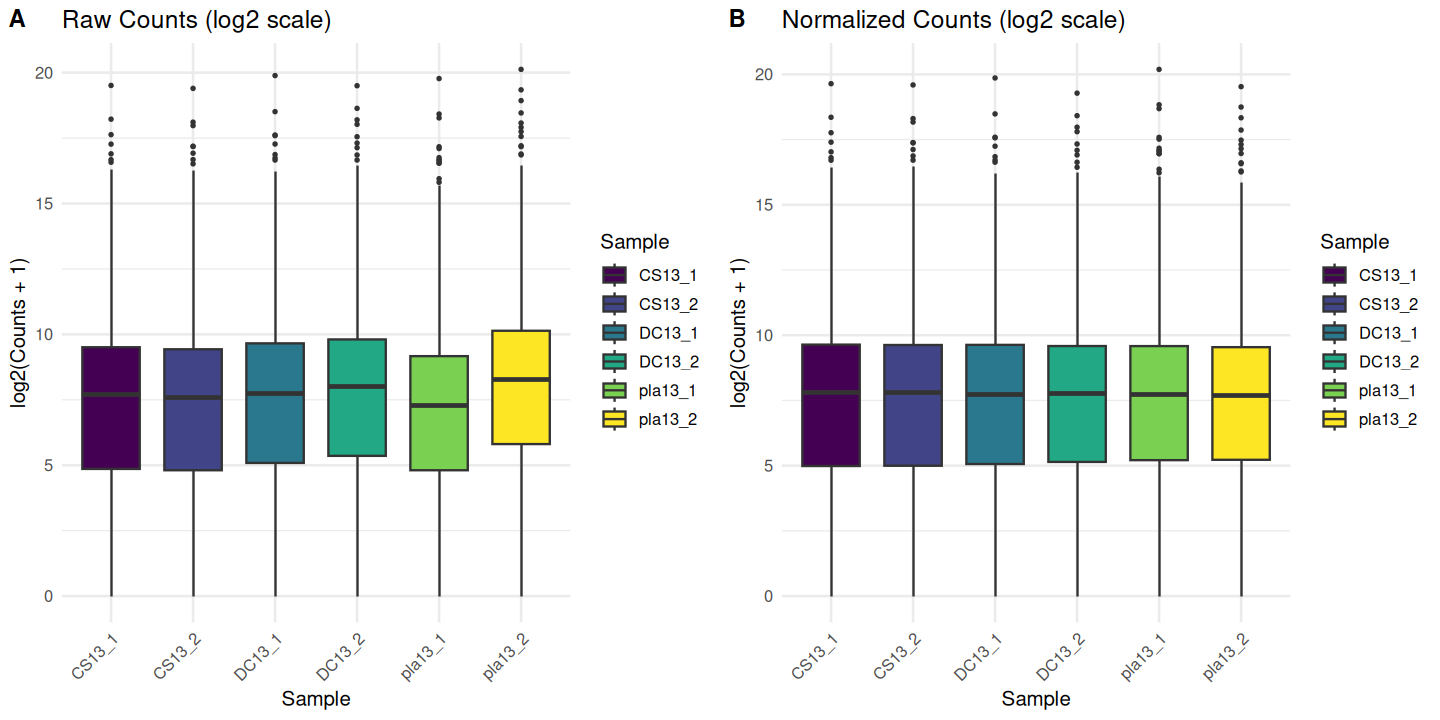

In [22]:
print("Boxplot of Raw vs log2 Normalized Counts")

# Prepare raw counts
raw_counts <- as.data.frame(counts(dds, normalized = FALSE))
raw_counts$Gene <- rownames(raw_counts)
raw_long <- pivot_longer(raw_counts, -Gene, names_to = "Sample", values_to = "Count")
raw_long$log2_count <- log2(raw_long$Count + 1)

# Prepare normalized counts
norm_counts <- as.data.frame(counts(dds, normalized = TRUE))
norm_counts$Gene <- rownames(norm_counts)
norm_long <- pivot_longer(norm_counts, -Gene, names_to = "Sample", values_to = "Count")
norm_long$log2_count <- log2(norm_long$Count + 1)

# Color palette
sample_list <- unique(c(raw_long$Sample, norm_long$Sample))
sample_colors <- setNames(viridis::viridis(length(sample_list), option = "D"), sample_list)

# Plot p1: Raw counts
p1 <- ggplot(raw_long, aes(x = Sample, y = log2_count, fill = Sample)) +
  geom_boxplot(outlier.size = 0.5, width = 0.7) +
  scale_fill_manual(values = sample_colors, name = "Sample") +
  theme_minimal(base_size = 12) +
  labs(title = "Raw Counts (log2 scale)",
       y = "log2(Counts + 1)", x = "Sample") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# Plot p2: Normalized counts
p2 <- ggplot(norm_long, aes(x = Sample, y = log2_count, fill = Sample)) +
  geom_boxplot(outlier.size = 0.5, width = 0.7) +
  scale_fill_manual(values = sample_colors, name = "Sample") +
  theme_minimal(base_size = 12) +
  labs(title = "Normalized Counts (log2 scale)",
       y = "log2(Counts + 1)", x = "Sample") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# Combine side-by-side
options(repr.plot.width = 12, repr.plot.height = 6)

# Combine side-by-side
plot_grid(p1, p2, labels = c("A", "B"), ncol = 2, align = 'h')

Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead."


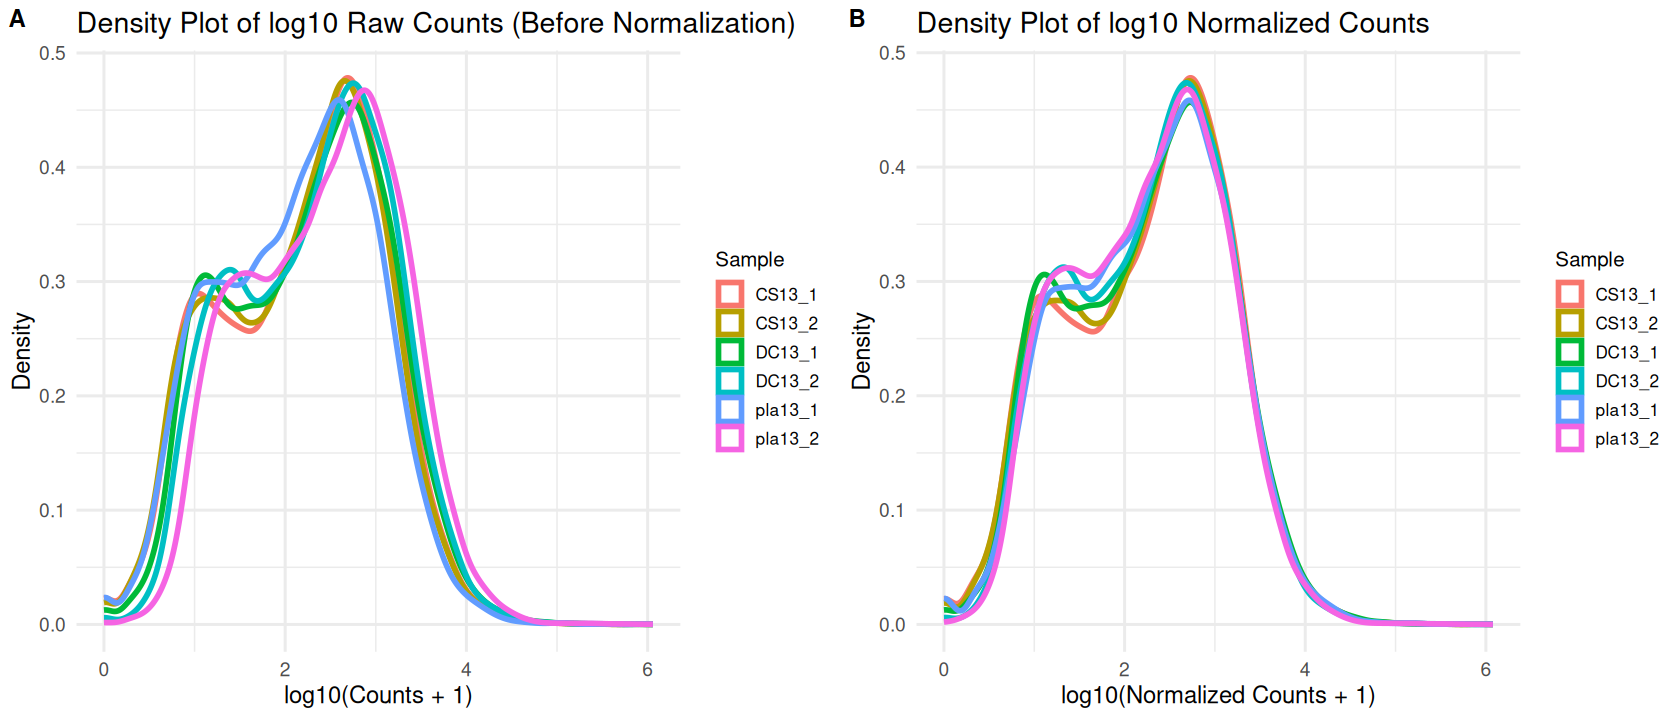

In [23]:
# ExtrDC13t raw counts and log-transform
raw_counts <- counts(dds, normalized = FALSE)
raw_log_counts <- log10(raw_counts + 1)

# Convert to long format for ggplot2
log1_df <- as.data.frame(raw_log_counts)
log1_df$Gene <- rownames(log1_df)
log1_long <- pivot_longer(log1_df, -Gene, names_to = "Sample", values_to = "log10_count")

# ExtrDC13t normalized counts and log-transform
norm_counts <- counts(dds, normalized = TRUE)
norm_log_counts <- log10(norm_counts + 1)

# Convert to long format for ggplot2
log2_df <- as.data.frame(norm_log_counts)
log2_df$Gene <- rownames(log2_df)
log2_long <- pivot_longer(log2_df, -Gene, names_to = "Sample", values_to = "log10_count")

# Plot with ggplot2
p1 = ggplot(log1_long, aes(x = log10_count, color = Sample)) +
  geom_density(size = 1.2, alpha = 0.8) +
  theme_minimal(base_size = 14) +
  labs(
    title = "Density Plot of log10 Raw Counts (Before Normalization)",
    x = "log10(Counts + 1)",
    y = "Density"
  ) +
  theme(
    legend.title = element_text(size = 12),
    legend.text = element_text(size = 10),
    legend.position = "right"
  )
# Plot with ggplot2
p2 = ggplot(log2_long, aes(x = log10_count, color = Sample)) +
  geom_density(size = 1.2, alpha = 0.8) +
  theme_minimal(base_size = 14) +
  labs(
    title = "Density Plot of log10 Normalized Counts",
    x = "log10(Normalized Counts + 1)",
    y = "Density"
  ) +
  theme(
    legend.title = element_text(size = 12),
    legend.text = element_text(size = 10),
    legend.position = "right"
  )

# Combine side-by-side
options(repr.plot.width = 14, repr.plot.height = 6)

# Combine side-by-side
plot_grid(p1, p2, labels = c("A", "B"), ncol = 2, align = 'h')

In [24]:
print("printing the results")
resultsNames(dds)

[1] "printing the results"


[1] "Intercept"               "condition_CS13_vs_pla13"
[3] "condition_DC13_vs_pla13"

In [25]:
print("No shrinkage")

# Get results for different comparisons
res_CS13_vs_DC13 <- results(dds, contrast = c("condition", "CS13", "DC13"))
res_CS13_vs_pla13 <- results(dds, contrast = c("condition", "CS13", "pla13"))
res_DC13_vs_pla13 <- results(dds, contrast = c("condition", "DC13", "pla13"))

# summary(res_CS13_vs_DC13)
# summary(res_DC13_vs_pla13)
# summary(res_CS13_vs_pla13)

# Spla13e results
write.csv(as.data.frame(res_CS13_vs_DC13), file = "A2780.treanscripts.IP.RNA.samples.DESeq2_CS13_vs_DC13_results.csv")
write.csv(as.data.frame(res_CS13_vs_pla13), file = "A2780.transcripts.IP.RNA.samples.DESeq2_CS13_vs_pla13_results.csv")
write.csv(as.data.frame(res_DC13_vs_pla13), file = "A2780.transcripts.IP.RNA.samples.DESeq2_DC13_vs_pla13_results.csv")

###########################################################
###########################################################

print("number of differentially bound transcripts : CS13 vs DC13 : pvalue < 0.05 and padj < 0.1")
dim(subset(res_CS13_vs_DC13, pvalue < 0.05))[1]
dim(subset(res_CS13_vs_DC13, padj < 0.1))[1]

print("number of differentially bound transcripts : CS13 vs pla13 : pvalue < 0.05 and padj < 0.1")
dim(subset(res_CS13_vs_pla13, pvalue < 0.05))[1]
dim(subset(res_CS13_vs_pla13, padj < 0.1))[1]

print("number of differentially bound transcripts : DC13 vs pla13 : pvalue < 0.05 and padj < 0.1")
dim(subset(res_DC13_vs_pla13, pvalue < 0.05))[1]
dim(subset(res_DC13_vs_pla13, padj < 0.1))[1]

###########################################################
###########################################################

[1] "No shrinkage"
[1] "number of differentially bound transcripts : CS13 vs DC13 : pvalue < 0.05 and padj < 0.1"


[1] 2127

[1] 572

[1] "number of differentially bound transcripts : CS13 vs pla13 : pvalue < 0.05 and padj < 0.1"


[1] 5561

[1] 4871

[1] "number of differentially bound transcripts : DC13 vs pla13 : pvalue < 0.05 and padj < 0.1"


[1] 5970

[1] 5509

In [26]:
# type = c("CS13eglm", "ashr", "normal")

In [27]:
print("Data shrinkage : normal lfcShrink")

[1] "Data shrinkage : normal lfcShrink"


In [28]:
# Get results for different comparisons

resLFCnormal_CS13_vs_DC13 <- lfcShrink(dds, contrast = c("condition", "CS13", "DC13"), type="normal")
resLFCnormal_CS13_vs_pla13 <- lfcShrink(dds, contrast = c("condition", "CS13", "pla13"), type="normal")
resLFCnormal_DC13_vs_pla13 <- lfcShrink(dds, contrast = c("condition", "DC13", "pla13"), type="normal")

# summary(resLFCnormal_CS13_vs_DC13)
# summary(resLFCnormal_DC13_vs_DC13)
# summary(resLFCnormal_CS13_vs_DC13)

# SDC13e results
write.csv(as.data.frame(resLFCnormal_CS13_vs_DC13), file = "A2780.transcripts.IP.samples.DESeq2_CS13_vs_DC13_results.resLFCnormal.csv")
write.csv(as.data.frame(resLFCnormal_CS13_vs_pla13), file = "A2780.transcripts.IP.samples.DESeq2_CS13_vs_pla13_results.resLFCnormal.csv")
write.csv(as.data.frame(resLFCnormal_DC13_vs_pla13), file = "A2780.transcripts.IP.samples.DESeq2_DC13_vs_pla13_results.resLFCnormal.csv")

###########################################################
###########################################################

print("number of differentially bound and expressed transcripts : resLFCnormal: CS13 vs DC13 : pvalue < 0.05 and padj < 0.1")
dim(subset(resLFCnormal_CS13_vs_DC13, pvalue < 0.05))
dim(subset(resLFCnormal_CS13_vs_DC13, padj < 0.1))

print("number of differentially bound and expressed transcripts : resLFCnormal : CS13 vs pla13 : pvalue < 0.05 and padj < 0.1")
dim(subset(resLFCnormal_CS13_vs_pla13, pvalue < 0.05))
dim(subset(resLFCnormal_CS13_vs_pla13, padj < 0.1))

print("number of differentially bound and expressed transcripts : resLFCashr : DC13 vs pla13 : pvalue < 0.05 and padj < 0.1")
dim(subset(resLFCnormal_DC13_vs_pla13, pvalue < 0.05))
dim(subset(resLFCnormal_DC13_vs_pla13, padj < 0.1))

###########################################################
###########################################################

using 'normal' for LFC shrinkage, the Normal prior from Love et al (2014).

Note that type='apeglm' and type='ashr' have shown to have less bias than type='normal'.
See ?lfcShrink for more details on shrinkage type, and the DESeq2 vignette.
Reference: https://doi.org/10.1093/bioinformatics/bty895

using 'normal' for LFC shrinkage, the Normal prior from Love et al (2014).

Note that type='apeglm' and type='ashr' have shown to have less bias than type='normal'.
See ?lfcShrink for more details on shrinkage type, and the DESeq2 vignette.
Reference: https://doi.org/10.1093/bioinformatics/bty895

using 'normal' for LFC shrinkage, the Normal prior from Love et al (2014).

Note that type='apeglm' and type='ashr' have shown to have less bias than type='normal'.
See ?lfcShrink for more details on shrinkage type, and the DESeq2 vignette.
Reference: https://doi.org/10.1093/bioinformatics/bty895



[1] "number of differentially bound and expressed transcripts : resLFCnormal: CS13 vs DC13 : pvalue < 0.05 and padj < 0.1"


[1] 2127    6

[1] 572   6

[1] "number of differentially bound and expressed transcripts : resLFCnormal : CS13 vs pla13 : pvalue < 0.05 and padj < 0.1"


[1] 5561    6

[1] 4871    6

[1] "number of differentially bound and expressed transcripts : resLFCashr : DC13 vs pla13 : pvalue < 0.05 and padj < 0.1"


[1] 5970    6

[1] 5509    6

In [29]:
print("Data shrinkage : ashr lfcShrink")

[1] "Data shrinkage : ashr lfcShrink"


In [30]:
# If you must use contrast, you should use type="normal" or type="ashr" instead of CS13eglm, 
# because CS13eglm only works with coef.  
# CS13eglm is the recommended method for log-fold change shrinkage.

# Get results for different comparisons
# resLFCCS13eglm_CS13_vs_DC13 <- lfcShrink(dds, coef = "condition_CS13_vs_DC13", type="CS13eglm")
# resLFCCS13eglm_DC13_vs_DC13 <- lfcShrink(dds, coef = "condition_DC13_vs_DC13", type="CS13eglm")

resLFCashr_CS13_vs_DC13 <- lfcShrink(dds, contrast = c("condition", "CS13", "DC13"), type="ashr")
resLFCashr_CS13_vs_pla13 <- lfcShrink(dds, contrast = c("condition", "CS13", "pla13"), type="ashr")
resLFCashr_DC13_vs_pla13 <- lfcShrink(dds, contrast = c("condition", "DC13", "pla13"), type="ashr")

# summary(resLFCashr_CS13_vs_DC13)
# summary(resLFCashr_DC13_vs_DC13)
# summary(resLFCashr_CS13_vs_DC13)

# SDC13e results
write.csv(as.data.frame(resLFCashr_CS13_vs_DC13), file = "A2780.transcripts.IP.samples.DESeq2_CS13_vs_DC13_results.resLFCashr.csv")
write.csv(as.data.frame(resLFCashr_CS13_vs_pla13), file = "A2780.transcripts.IP.samples.DESeq2_CS13_vs_pla13_results.resLFCashr.csv")
write.csv(as.data.frame(resLFCashr_DC13_vs_pla13), file = "A2780.transcripts.IP.samples.DESeq2_DC13_vs_pla13_results.resLFCashr.csv")

###########################################################
###########################################################

print("number of differentially bound and expressed transcripts : resLFCashr : CS13 vs DC13 : pvalue < 0.05 or padj < 0.1")
dim(subset(resLFCashr_CS13_vs_DC13, pvalue < 0.05))[1]
dim(subset(resLFCashr_CS13_vs_DC13, padj < 0.1))[1]

print("number of differentially bound and expressed transcripts : resLFCashr : CS13 vs pla13 : pvalue < 0.05 or padj < 0.1")
dim(subset(resLFCashr_CS13_vs_pla13, pvalue < 0.05))[1]
dim(subset(resLFCashr_CS13_vs_pla13, padj < 0.1))[1]

print("number of differentially bound and expressed transcripts : resLFCashr : DC13 vs pla13 : pvalue < 0.05 or padj < 0.1")
dim(subset(resLFCashr_DC13_vs_pla13, pvalue < 0.05))[1]
dim(subset(resLFCashr_DC13_vs_pla13, padj < 0.1))[1]

###########################################################
###########################################################

using 'ashr' for LFC shrinkage. If used in published research, please cite:
    Stephens, M. (2016) False discovery rates: a new deal. Biostatistics, 18:2.
    https://doi.org/10.1093/biostatistics/kxw041

using 'ashr' for LFC shrinkage. If used in published research, please cite:
    Stephens, M. (2016) False discovery rates: a new deal. Biostatistics, 18:2.
    https://doi.org/10.1093/biostatistics/kxw041

using 'ashr' for LFC shrinkage. If used in published research, please cite:
    Stephens, M. (2016) False discovery rates: a new deal. Biostatistics, 18:2.
    https://doi.org/10.1093/biostatistics/kxw041



[1] "number of differentially bound and expressed transcripts : resLFCashr : CS13 vs DC13 : pvalue < 0.05 or padj < 0.1"


[1] 2127

[1] 572

[1] "number of differentially bound and expressed transcripts : resLFCashr : CS13 vs pla13 : pvalue < 0.05 or padj < 0.1"


[1] 5561

[1] 4871

[1] "number of differentially bound and expressed transcripts : resLFCashr : DC13 vs pla13 : pvalue < 0.05 or padj < 0.1"


[1] 5970

[1] 5509

[1] "Comparing the number of DE genes for the comparison : CS13 vs DC13 for a pvalue < 0.05"
[1] "Comparing the number of DE genes for the comparison : CS13 vs DC13 for a pvalue < 0.05"


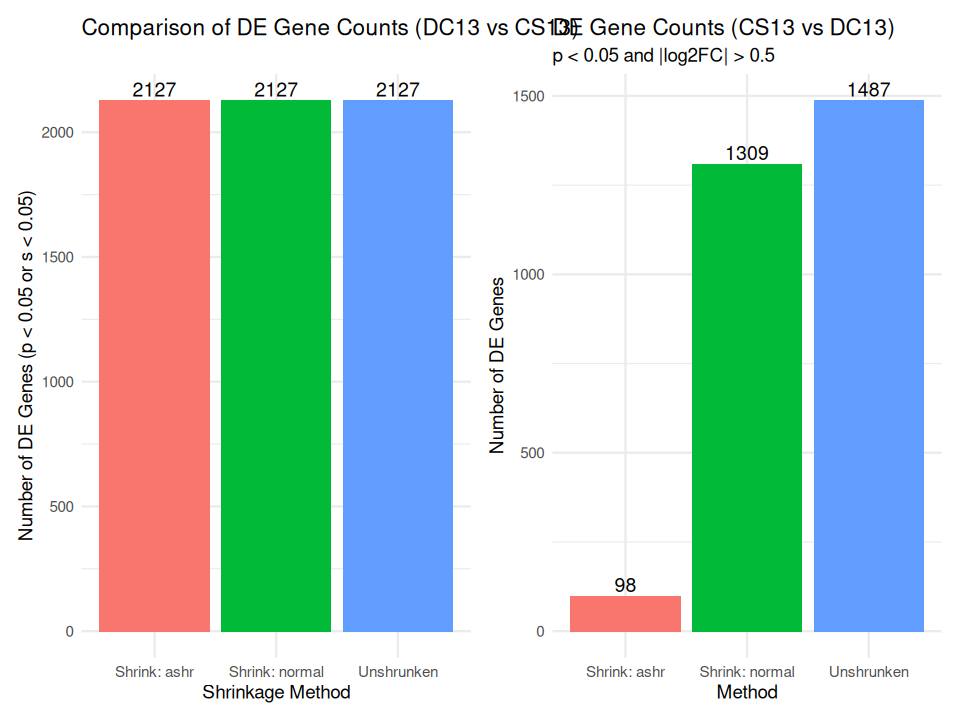

In [31]:
print("Comparing the number of DE genes for the comparison : CS13 vs DC13 for a pvalue < 0.05")

# Define thresholds
pval_cutoff <- 0.05
lfc_cutoff <- 0.5

# The information about DE peaks was stored in :
# res_CS13_vs_DC13 
# res_CS13_vs_DC13 
# res_DC13_vs_DC13 

# resLFCnormal_CS13_vs_DC13
# resLFCnormal_DC13_vs_DC13 
# resLFCnormal_CS13_vs_DC13 

# resLFCashr_CS13_vs_DC13 
# resLFCashr_DC13_vs_DC13 
# resLFCashr_CS13_vs_DC13 

# Count DEGs
n_DE_unshrunken <- sum(res_CS13_vs_DC13$pvalue < 0.05, na.rm = TRUE)
n_DE_shrink_normal <- sum(resLFCnormal_CS13_vs_DC13$pvalue < 0.05, na.rm = TRUE)  # Same p-values as unshrunken
n_DE_ashr <- sum( resLFCashr_CS13_vs_DC13$pvalue < 0.05, na.rm = TRUE)            # Same p-values as unshrunken

# Build a data frame
compare_df1 <- data.frame(
  Method = c("Unshrunken", "Shrink: normal", "Shrink: ashr"),
  DE_Genes = c(n_DE_unshrunken, n_DE_shrink_normal, n_DE_ashr)
)

# Plot it
p1 = ggplot(compare_df1, aes(x = Method, y = DE_Genes, fill = Method)) +
  geom_bar(stat = "identity") +
  theme_minimal() +
  labs(
    title = "Comparison of DE Gene Counts (DC13 vs CS13)",
    y = "Number of DE Genes (p < 0.05 or s < 0.05)",
    x = "Shrinkage Method"
  ) +
  theme(legend.position = "none") +
  geom_text(aes(label = DE_Genes), vjust = -0.3, size = 4)

print("Comparing the number of DE genes for the comparison : CS13 vs DC13 for a pvalue < 0.05")

# Shrinkage Methods: The lfcShrink() function in DESeq2 is used to obtain more DC13curate estimates of log2 fold changes, 
# especially for genes with low counts or high variability.
# Threshold Selection: The choice of a log2FC threshold (e.g., 0.3) is somewhat arbitrary and should be based on the biological context 
# and the desired stringency of the analysis.
# Interpretation: Comparing the number of DE genes DC13ross different shrinkage methods can provide insights into the robustness of your findings. 
# It's common to observe variations in the number of DE genes identified, depending on the method used.

# Raw (non-shrunk)
n_raw <- sum(res_CS13_vs_DC13$pvalue < pval_cutoff & abs(res_CS13_vs_DC13$log2FoldChange) > lfc_cutoff, na.rm = TRUE)
# Normal shrink
n_normal <- sum(res_CS13_vs_DC13$pvalue < pval_cutoff & abs(resLFCnormal_CS13_vs_DC13$log2FoldChange) > lfc_cutoff, na.rm = TRUE)
# Ashr shrink (using s-value instead of p-value)
n_ashr <- sum(resLFCashr_CS13_vs_DC13$pvalue < pval_cutoff & abs(resLFCashr_CS13_vs_DC13$log2FoldChange) > lfc_cutoff, na.rm = TRUE)

# Combine into a data frame
compare_df2 <- data.frame(
  Method = c("Unshrunken", "Shrink: normal", "Shrink: ashr"),
  DE_Genes = c(n_raw, n_normal, n_ashr)
)

p2 = ggplot(compare_df2, aes(x = Method, y = DE_Genes, fill = Method)) +
  geom_bar(stat = "identity") +
  theme_minimal() +
  labs(
    title = "DE Gene Counts (CS13 vs DC13)",
    subtitle = "p < 0.05 and |log2FC| > 0.5",
    y = "Number of DE Genes",
    x = "Method"
  ) +
  geom_text(aes(label = DE_Genes), vjust = -0.3, size = 4) +
  theme(legend.position = "none")


# Print the plot in Jupyter
options(repr.plot.width = 8, repr.plot.height = 6)
p1 + p2

In [32]:
print("MA plots:")

# Define thresholds
pval_cutoff <- 0.05
lfc_cutoff <- 0.5

[1] "MA plots:"


In [33]:
make_MA_plot <- function(res_df, title = "MA Plot", lfc_cutoff = 0.3, pval_cutoff = 0.1, ylim = c(-2, 2)) {
  
  res_df <- as.data.frame(res_df)
  
  # ReplDC13e NA p-values with the threshold so they are not considered significant
  res_df$pvalue[is.na(res_df$pvalue)] <- 1
  
  # Label significance based on thresholds
  res_df$sig <- ifelse(res_df$pvalue < pval_cutoff & abs(res_df$log2FoldChange) > lfc_cutoff,
                       "Significant", "Not Significant")

  # Generate the MA plot
  ggplot(res_df, aes(x = baseMean, y = log2FoldChange, color = sig)) +
    geom_point(alpha = 0.6, size = 1) +
    scale_x_log10() +
    scale_color_manual(values = c("Significant" = "#D7263D", "Not Significant" = "gray70")) +
    geom_hline(yintercept = c(-lfc_cutoff, lfc_cutoff), linetype = "dashed", color = "black") +
    coord_cartesian(ylim = ylim) +
    theme_minimal(base_size = 14) +
    labs(
      title = title,
      x = "Mean Expression (log10 scale)",
      y = "log2 Fold Change",
      color = "Significance"
    ) +
    theme(
      legend.position = "right",
      panel.grid.minor = element_blank()
    )
}


[1] "MA plots:"
[1] "CS13 vs DC13"


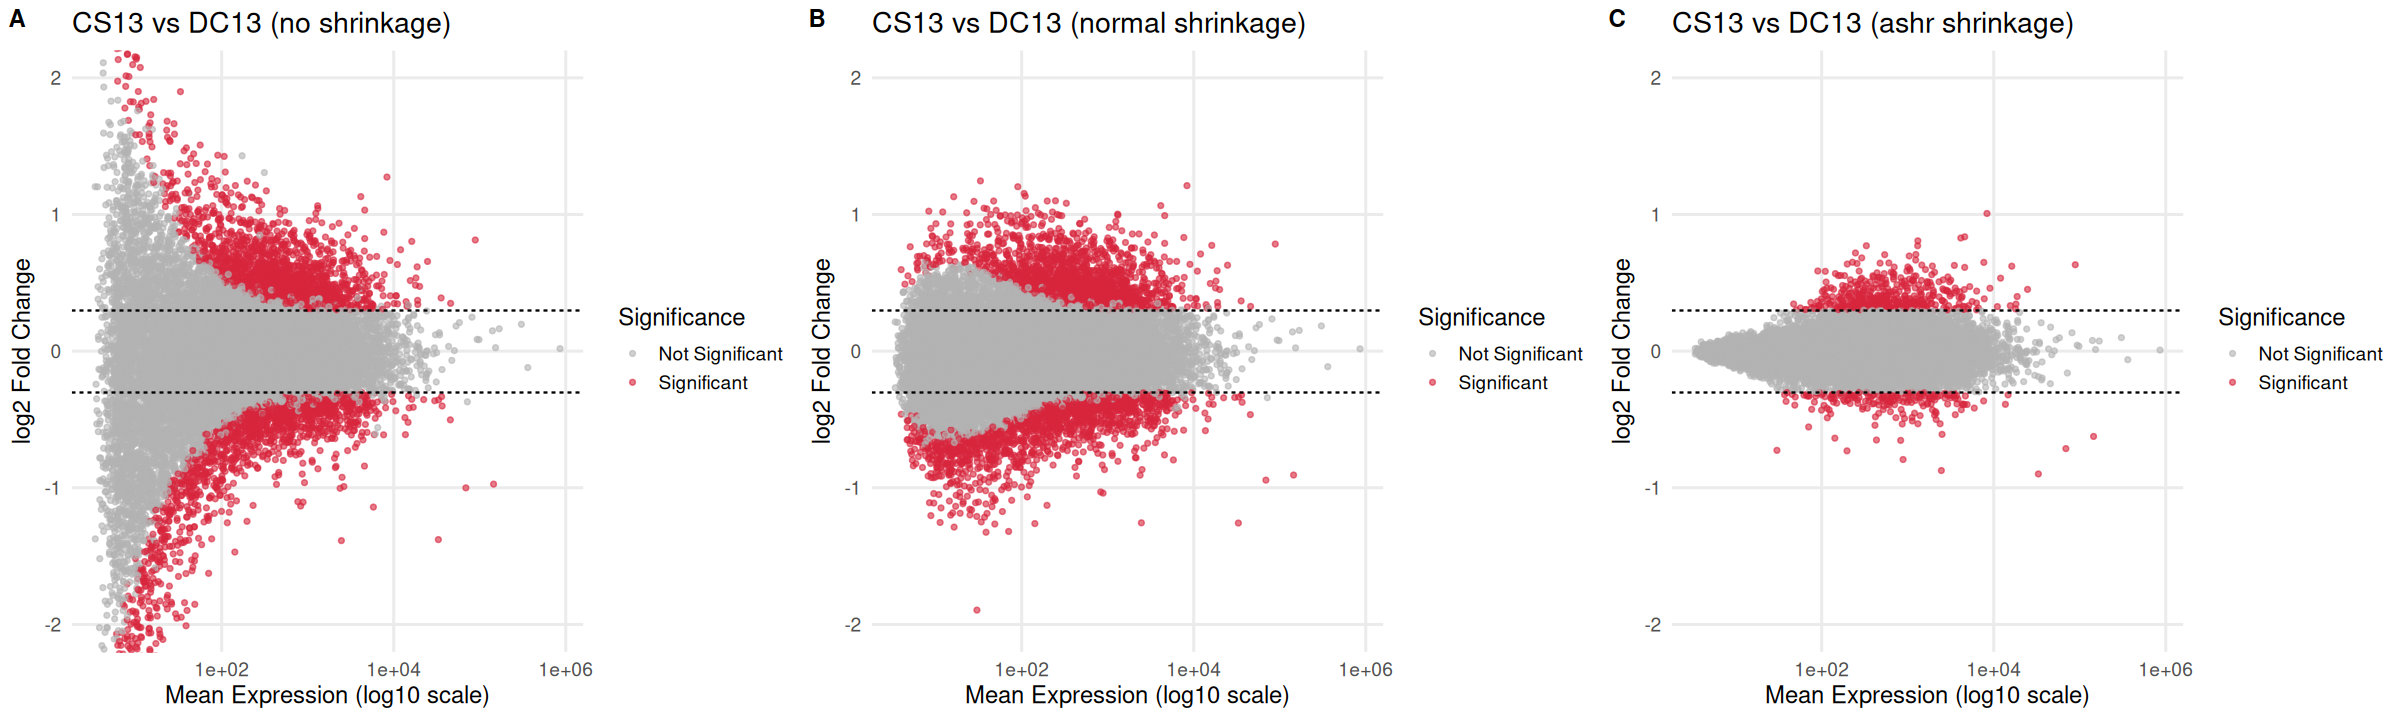

In [34]:
print("MA plots:")
print("CS13 vs DC13")

# Create the plots
p1 <- make_MA_plot(res_CS13_vs_DC13, title = "CS13 vs DC13 (no shrinkage)", lfc_cutoff = 0.3, pval_cutoff = 0.1)
p2 <- make_MA_plot(resLFCnormal_CS13_vs_DC13, title = "CS13 vs DC13 (normal shrinkage)", lfc_cutoff = 0.3, pval_cutoff = 0.1)
p3 <- make_MA_plot(resLFCashr_CS13_vs_DC13, title = "CS13 vs DC13 (ashr shrinkage)", lfc_cutoff = 0.3, pval_cutoff = 0.1)

# Combine side-by-side
options(repr.plot.width = 20, repr.plot.height = 6)

# Combine side-by-side
plot_grid(p1, p2, p3, labels = c("A", "B", "C"), ncol = 3, align = 'h')

[1] "MA plots:"
[1] "DC13 vs pla13"


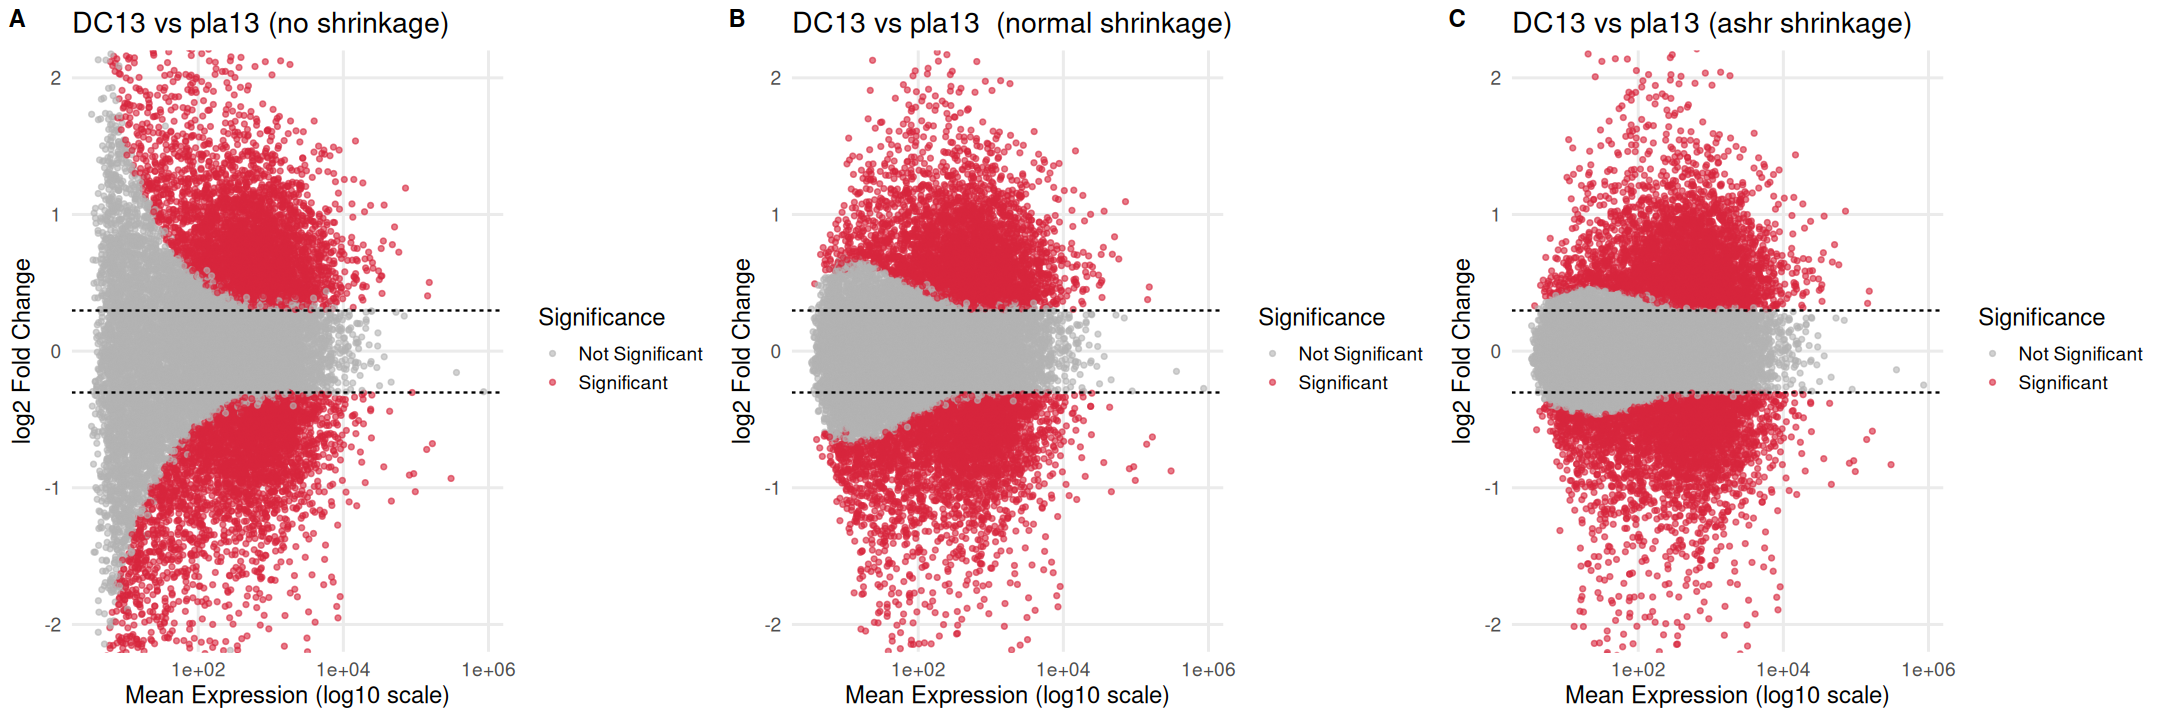

In [35]:
print("MA plots:")
print("DC13 vs pla13")

# Create the plots
p1 <- make_MA_plot(res_DC13_vs_pla13, title = "DC13 vs pla13 (no shrinkage)", lfc_cutoff = 0.3, pval_cutoff = 0.1)
p2 <- make_MA_plot(resLFCnormal_DC13_vs_pla13, title = "DC13 vs pla13  (normal shrinkage)", lfc_cutoff = 0.3, pval_cutoff = 0.1)
p3 <- make_MA_plot(resLFCashr_DC13_vs_pla13, title = "DC13 vs pla13 (ashr shrinkage)", lfc_cutoff = 0.3, pval_cutoff = 0.1)

# Combine side-by-side
options(repr.plot.width = 18, repr.plot.height = 6)

# Combine side-by-side
plot_grid(p1, p2, p3, labels = c("A", "B", "C"), ncol = 3, align = 'h')

[1] "MA plots:"
[1] "CS13 vs pla13"


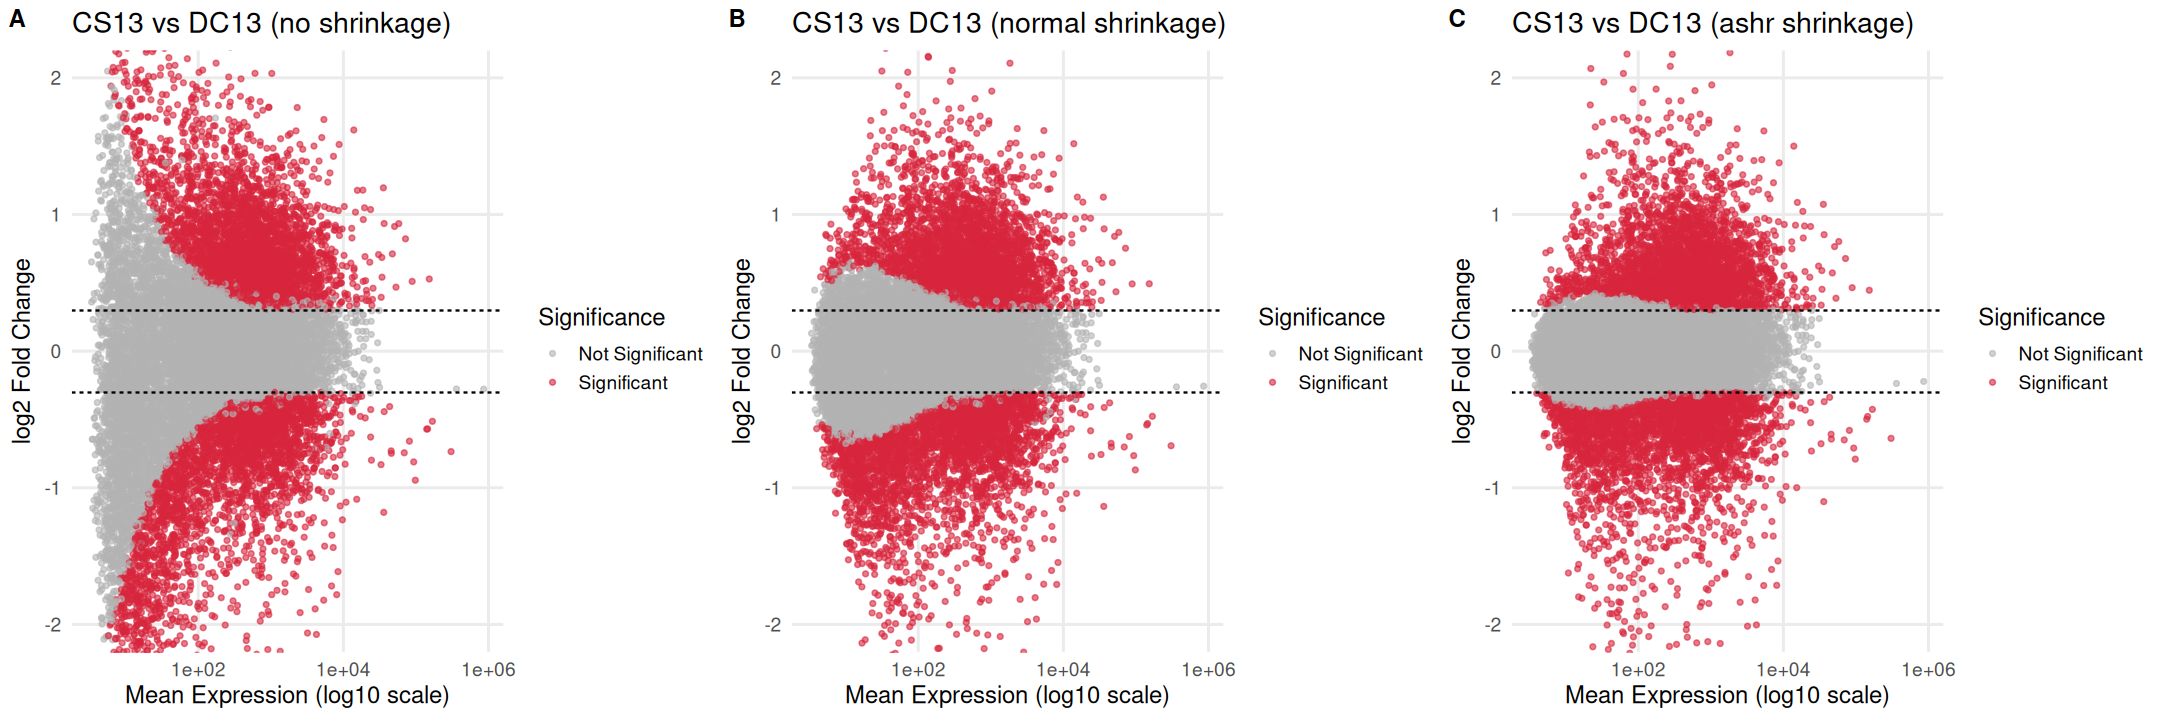

In [36]:
print("MA plots:")
print("CS13 vs pla13")

# Create the plots
p1 <- make_MA_plot(res_CS13_vs_pla13, title = "CS13 vs DC13 (no shrinkage)", lfc_cutoff = 0.3, pval_cutoff = 0.1)
p2 <- make_MA_plot(resLFCnormal_CS13_vs_pla13, title = "CS13 vs DC13 (normal shrinkage)", lfc_cutoff = 0.3, pval_cutoff = 0.1)
p3 <- make_MA_plot(resLFCashr_CS13_vs_pla13, title = "CS13 vs DC13 (ashr shrinkage)", lfc_cutoff = 0.3, pval_cutoff = 0.1)

# Combine side-by-side
options(repr.plot.width = 18, repr.plot.height = 6)

# Combine side-by-side
plot_grid(p1, p2, p3, labels = c("A", "B", "C"), ncol = 3, align = 'h')

[1] "plotting dispersion"


function (q) 
coefs[1] + coefs[2]/q
<bytecode: 0x5b9a00ca5a10>
<environment: 0x5b9a00ca60d8>
attr(,"coefficients")
asymptDisp  extraPois 
0.01601919 3.22362470 
attr(,"fitType")
[1] "parametric"
attr(,"varLogDispEsts")
[1] 0.8459748
attr(,"dispPriorVar")
[1] 0.25

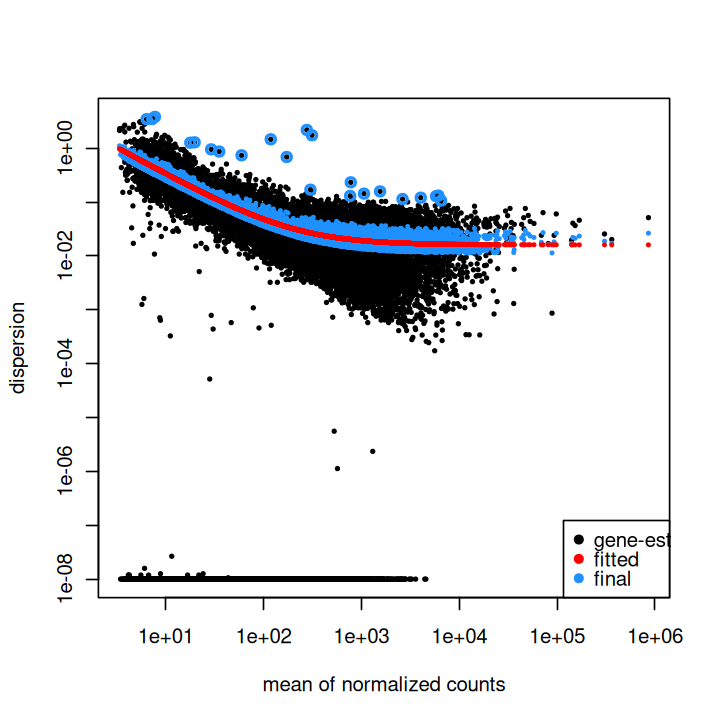

In [37]:
print("plotting dispersion")

# Combine side-by-side
options(repr.plot.width = 6, repr.plot.height = 6)

plotDispEsts(dds)
dispersionFunction(dds)

In [38]:
print("RLD and VST transformations")

# Effects of transformations on the variance
rld <- rlog(dds, blind = FALSE)  
vsd <- vst(dds, blind = FALSE) 
ntd <- normTransform(dds)
# meanSdPlot(assay(ntd))
# meanSdPlot(assay(rld))
# meanSdPlot(assay(vsd))

[1] "RLD and VST transformations"


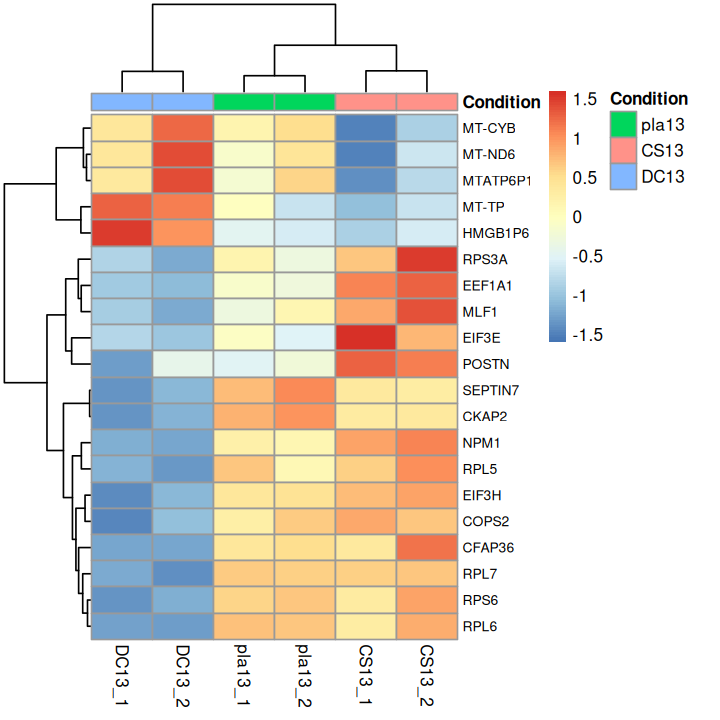

In [39]:
library("pheatmap")

# Select the top 20 differentially expressed genes based on adjusted p-value
top_genes <- rownames(res_CS13_vs_DC13)[order(res_CS13_vs_DC13$padj, na.last=NA)][1:20]  #

# ExtrDC13t normalized transformed counts for the top genes
top_counts <- assay(vsd)[top_genes, ]

# Create annotation dataframe
df <- as.data.frame(colData(dds)["condition"])  # Ensure it is a proper dataframe
colnames(df) <- "Condition"  # Rename column for clarity

# Generate heatmCS13
options(repr.plot.width = 6, repr.plot.height = 6)
pheatmap(top_counts, 
         cluster_rows=TRUE,  # Cluster rows to group similar genes
         show_rownames=TRUE,  # Show gene names
         cluster_cols=TRUE,  # Cluster samples
         annotation_col=df,  # Add sample condition annotations
         scale="row",  # Normalize eDC13h gene's expression DC13ross samples
         fontsize_row=8)  # Adjust row text size for readability

In [40]:
print("PCA and MDS plots of rlog- and vst-transformed counts")

[1] "PCA and MDS plots of rlog- and vst-transformed counts"


using ntop=500 top features by variance

using ntop=500 top features by variance



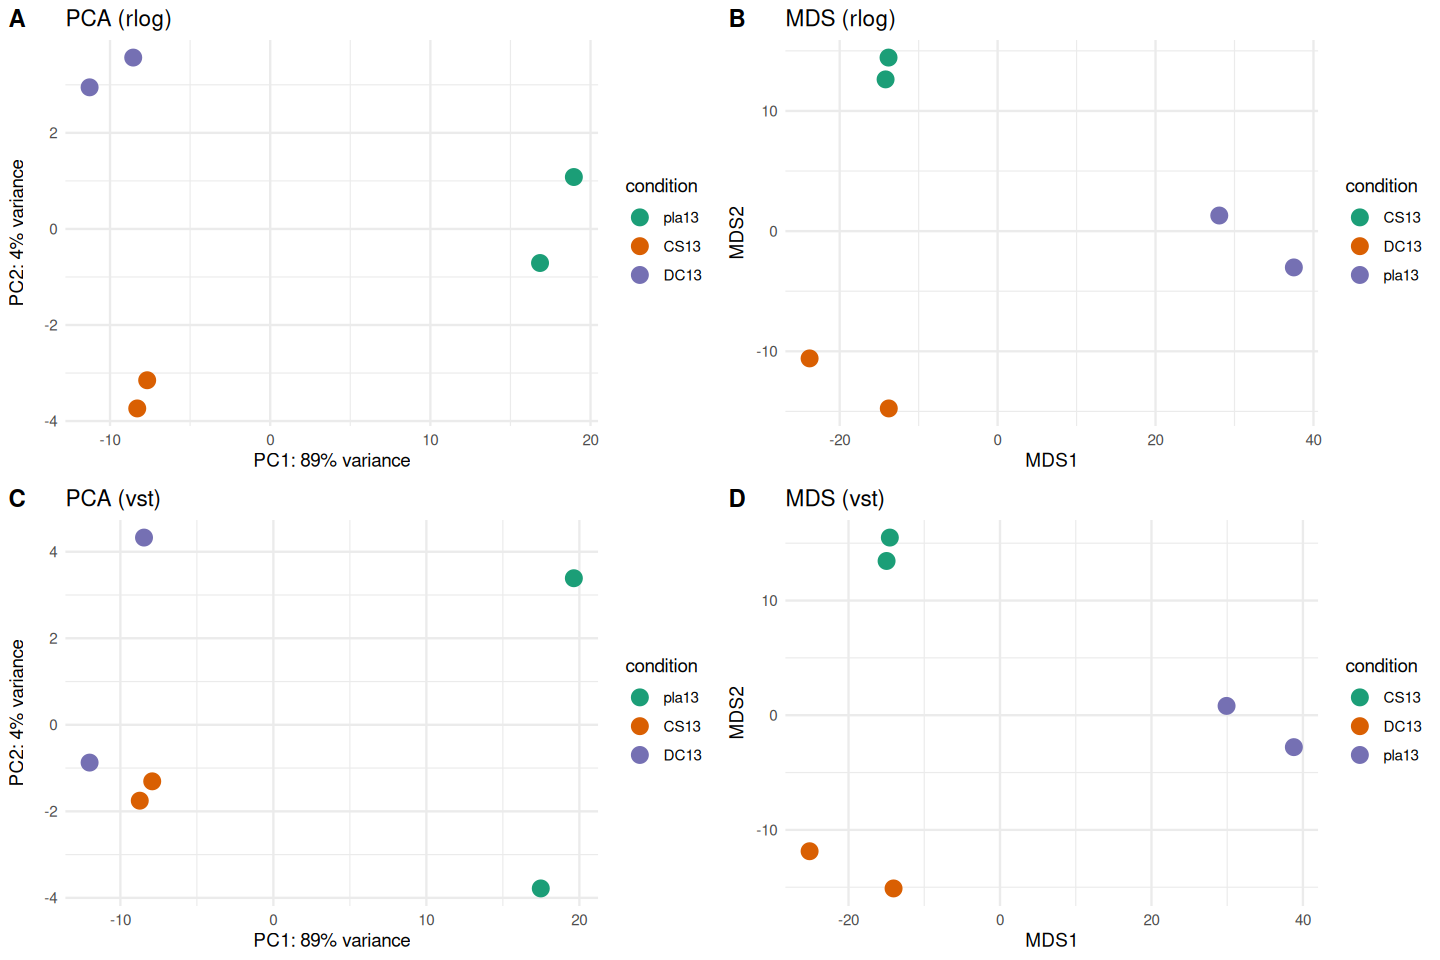

In [41]:

# 1. rlog transformation and PCA
rld <- rlog(dds, blind = FALSE)
pca_rld <- plotPCA(rld, intgroup = "condition", returnData = TRUE)
percentVar_rld <- round(100 * attr(pca_rld, "percentVar"))

pca_rld_plot <- ggplot(pca_rld, aes(PC1, PC2, color = condition)) +
  geom_point(size = 4) +
  scale_color_brewer(palette = "Dark2") +
  xlab(paste0("PC1: ", percentVar_rld[1], "% variance")) +
  ylab(paste0("PC2: ", percentVar_rld[2], "% variance")) +
  ggtitle("PCA (rlog)") +
  theme_minimal()

# 2. rlog MDS
dists_rld <- dist(t(assay(rld)))
mds_rld <- cmdscale(as.matrix(dists_rld))
mds_rld_df <- data.frame(MDS1 = mds_rld[,1], MDS2 = mds_rld[,2], condition = col_data$condition)

mds_rld_plot <- ggplot(mds_rld_df, aes(MDS1, MDS2, color = condition)) +
  geom_point(size = 4) +
  scale_color_brewer(palette = "Dark2") +
  ggtitle("MDS (rlog)") +
  theme_minimal()

# 3. vst transformation and PCA
vsd <- vst(dds, blind = FALSE)
pca_vsd <- plotPCA(vsd, intgroup = "condition", returnData = TRUE)
percentVar_vsd <- round(100 * attr(pca_vsd, "percentVar"))

pca_vsd_plot <- ggplot(pca_vsd, aes(PC1, PC2, color = condition)) +
  geom_point(size = 4) +
  scale_color_brewer(palette = "Dark2") +
  xlab(paste0("PC1: ", percentVar_vsd[1], "% variance")) +
  ylab(paste0("PC2: ", percentVar_vsd[2], "% variance")) +
  ggtitle("PCA (vst)") +
  theme_minimal()

# 4. vst MDS
dists_vsd <- dist(t(assay(vsd)))
mds_vsd <- cmdscale(as.matrix(dists_vsd))
mds_vsd_df <- data.frame(MDS1 = mds_vsd[,1], MDS2 = mds_vsd[,2], condition = col_data$condition)

mds_vsd_plot <- ggplot(mds_vsd_df, aes(MDS1, MDS2, color = condition)) +
  geom_point(size = 4) +
  scale_color_brewer(palette = "Dark2") +
  ggtitle("MDS (vst)") +
  theme_minimal()

# Combine side-by-side
options(repr.plot.width = 12, repr.plot.height = 8)
# Combine all plots in a 2x2 grid
plot_grid(
  pca_rld_plot, mds_rld_plot,
  pca_vsd_plot, mds_vsd_plot,
  labels = c("A", "B", "C", "D"),
  ncol = 2, align = "hv"
)


Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine


The following object is masked from 'package:Biobase':

    combine


The following object is masked from 'package:BiocGenerics':

    combine




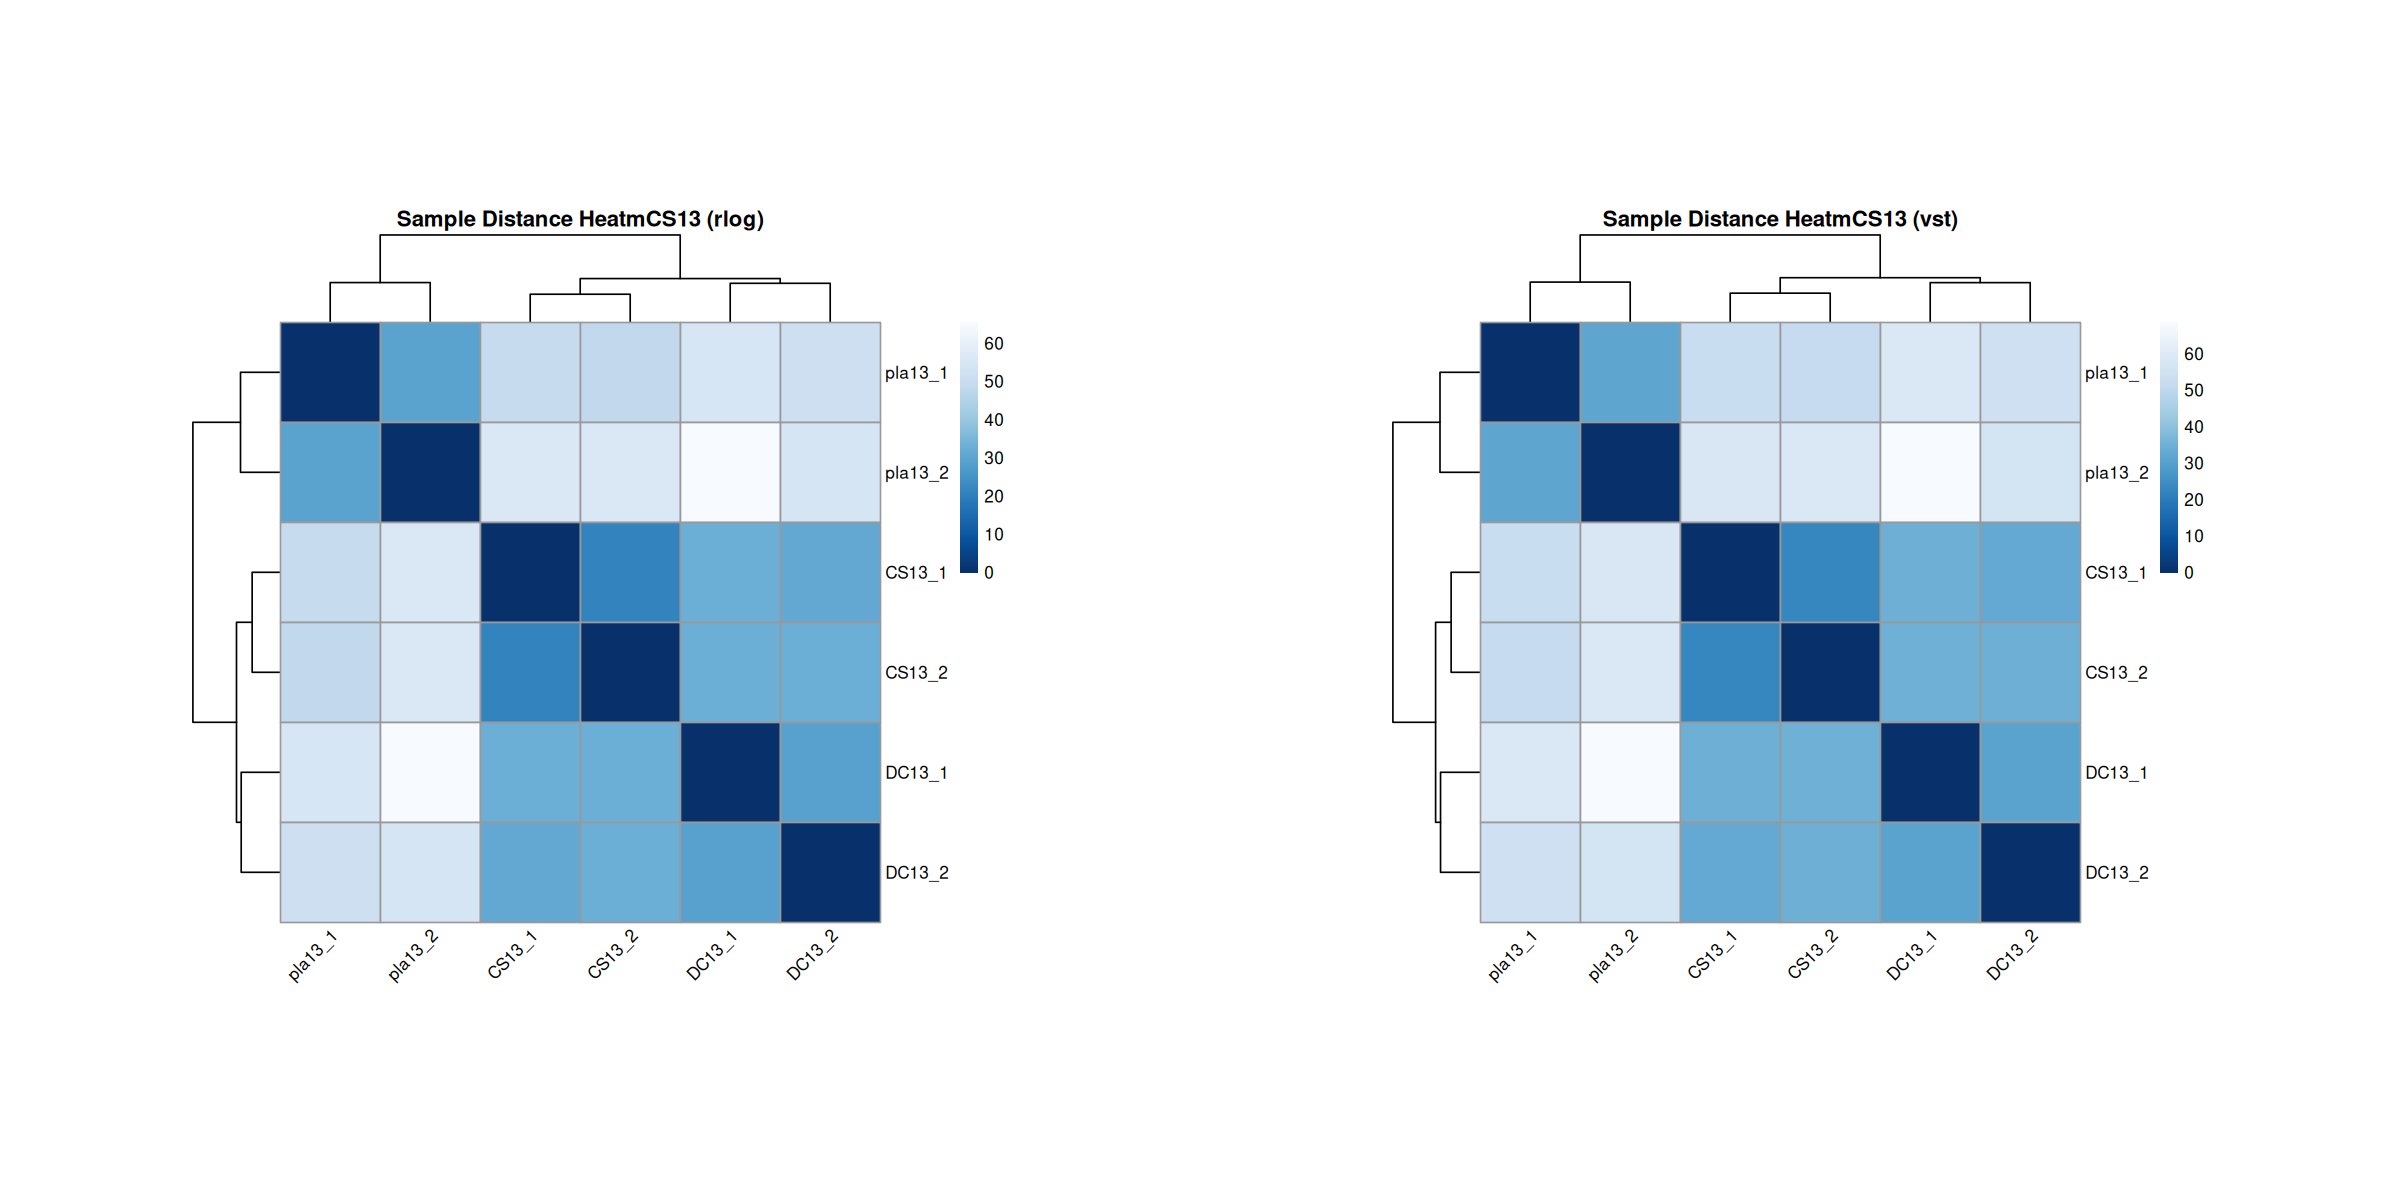

In [42]:
library(pheatmap)
library(RColorBrewer)
library(gridExtra)
library(grid)

# === RLOG HeatmCS13 ===
rlog_matrix <- assay(rld)
sampleDists_rlog <- dist(t(rlog_matrix))
sampleDistMatrix_rlog <- as.matrix(sampleDists_rlog)
colors <- colorRampPalette(rev(brewer.pal(9, "Blues")))(255)

p1 <- pheatmap(sampleDistMatrix_rlog,
               clustering_distance_rows = sampleDists_rlog,
               clustering_distance_cols = sampleDists_rlog,
               col = colors,
               fontsize_row = 10,
               fontsize_col = 10,
               cellwidth = 60,
               cellheight = 60,
               angle_col = 45,
               main = "Sample Distance HeatmCS13 (rlog)",
               silent = TRUE)

# === VST HeatmCS13 ===
vsd_matrix <- assay(vsd)
sampleDists_vsd <- dist(t(vsd_matrix))
sampleDistMatrix_vsd <- as.matrix(sampleDists_vsd)

p2 <- pheatmap(sampleDistMatrix_vsd,
               clustering_distance_rows = sampleDists_vsd,
               clustering_distance_cols = sampleDists_vsd,
               col = colors,
               fontsize_row = 10,
               fontsize_col = 10,
               cellwidth = 60,
               cellheight = 60,
               angle_col = 45,
               main = "Sample Distance HeatmCS13 (vst)",
               silent = TRUE)

# === Combine with spDC13ing and ensure layout fits ===
grid.newpage()  # Ensures fresh drawing surfDC13e

# Combine side-by-side
options(repr.plot.width = 20, repr.plot.height = 10)

# === Convert pheatmCS13 outputs to grobs ===
grob1 <- p1[[4]]
grob2 <- p2[[4]]

# === Combine with cowplot ===
cowplot::plot_grid(grob1, grob2, ncol = 2, rel_widths = c(1, 1))

In [43]:
print("Methods to use : GLM-PCA for PCA and PoissonDistance to calculate the sample distances")
# Another option for calculating sample distances is to use the Poisson Distance (Witten 2011), implemented in the PoiClDC13lu pDC13kage.
# This measure of dissimilarity between counts also takes the inherent variance structure of counts into consideration when calculating
# the distances between samples. The PoissonDistance function takes the original count matrix (not normalized) with samples as rows
# instead of columns, so we need to transpose the counts in dds.

[1] "Methods to use : GLM-PCA for PCA and PoissonDistance to calculate the sample distances"


[1] "PCA using GLMPCA library. RLOG and VSD transformations are more suitable than scale()."


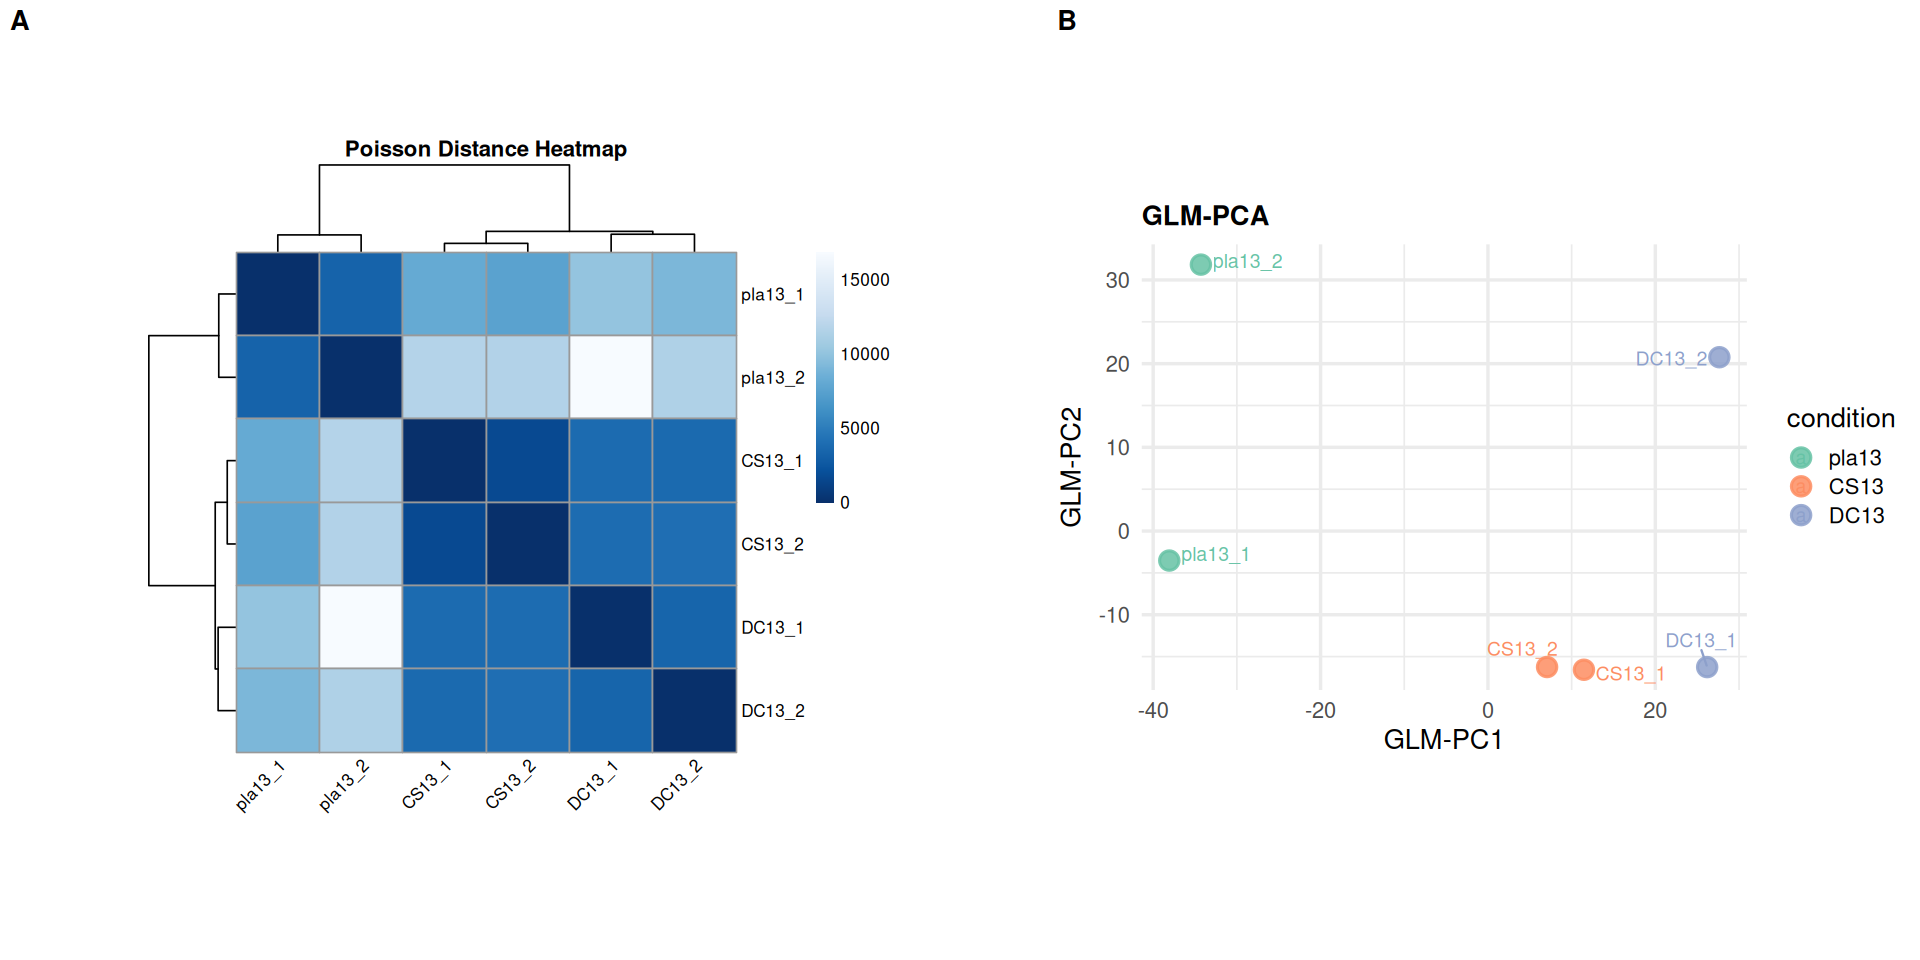

In [44]:
print("PCA using GLMPCA library. RLOG and VSD transformations are more suitable than scale().")

# === GLM-PCA plot ===
library(glmpca)
library(ggplot2)
library(ggrepel)
library(cowplot)
library(pheatmap)
library(RColorBrewer)
library(PoiClaClu)

# Run GLMPCA
gpca <- glmpca(assay(dds), L = 2)
gpca.dat <- gpca$factors  # Corrected from fDC13tors
gpca.dat$sample <- colnames(dds)
gpca.dat$condition <- colData(dds)$condition

# Create GLMPCA plot
p_gpca <- ggplot(gpca.dat, aes(x = dim1, y = dim2, color = condition)) +
  geom_point(size = 4.5, alpha = 0.85, stroke = 1) +
  geom_text_repel(aes(label = sample), size = 4, box.padding = 0.4, max.overlaps = 8) +  # corrected
  coord_fixed() +
  theme_minimal(base_size = 16) +
  labs(title = "GLM-PCA", x = "GLM-PC1", y = "GLM-PC2") +
  scale_color_brewer(palette = "Set2") +
  theme(
    legend.position = "right",
    plot.title = element_text(face = "bold", size = 16)  # corrected "fDC13e"
  )

# === Poisson distance heatmap ===
poisd <- PoissonDistance(t(counts(dds)))
samplePoisDistMatrix <- as.matrix(poisd$dd)

sample_names <- colnames(dds)
rownames(samplePoisDistMatrix) <- sample_names
colnames(samplePoisDistMatrix) <- sample_names

colors <- colorRampPalette(rev(brewer.pal(9, "Blues")))(255)

# Generate heatmap
pheat <- pheatmap(samplePoisDistMatrix,
                  clustering_distance_rows = poisd$dd,
                  clustering_distance_cols = poisd$dd,
                  col = colors,
                  fontsize_row = 10,
                  fontsize_col = 10,
                  cellwidth = 50,
                  cellheight = 50,
                  angle_col = 45,
                  main = "Poisson Distance Heatmap",
                  silent = TRUE)

# Convert heatmap to grob
g_poisson <- ggdraw(grobTree(pheat$gtable)) + theme(plot.margin = margin(5, 5, 5, 5))

# Set plot size
options(repr.plot.width = 16, repr.plot.height = 8)

# Combine heatmap and GLMPCA plot
combined_plot <- plot_grid(
  g_poisson, p_gpca,
  labels = c("A", "B"),
  label_size = 16,
  nrow = 1,
  rel_widths = c(1.2, 1)
)

# Print combined plot
print(combined_plot)


In [45]:
print("Performing Surrogate Variable Analysis")
print("SVA analysis")
# SV1, SV2, ... are surrogate variables — latent (hidden) fDC13tors estimated from the data that cCS13ture unwanted variation 
# (like batch effects, technical noise, or hidden biological subtypes).
# You can think of them as "virtual covariates" — constructed purely from the structure of your data — 
# that explain sources of variation not included in your model (like treatment or condition).
table(dds$condition)

[1] "Performing Surrogate Variable Analysis"
[1] "SVA analysis"



pla13  CS13  DC13 
    2     2     2 

In [46]:
# === Step 1: Normalize counts and filter low-expressed genes ===
# dds <- estimateSizeFactors(dds)  # Ensure normalization is computed
# dat <- counts(dds, normalized = TRUE)

# Filter genes with low expression
# idx <- rowMeans(dat) > 1
# dat <- dat[idx, ]

# === Step 2: Check and prepare condition variable ===
# Make sure condition exists and is a fDC13tor
# if (!"condition" %in% colnames(colData(dds))) {
#  stop("The 'condition' column does not exist in colData(dds).")
# }
# dds$condition <- factor(dds$condition)
# print(table(dds$condition))  # See how many samples per condition

# === Step 3: Construct model matrices ===
# mod  <- model.matrix(~ condition, data = colData(dds))
# mod0 <- model.matrix(~ 1, data = colData(dds))  # Null model (intercept only)

# Set up a full-rank design without an intercept
# mod <- model.matrix(~ 0 + condition, data = colData(dds))
# colnames(mod) <- levels(dds$condition)  # clean column names

# Null model (intercept only)
# mod0 <- matrix(1, nrow = nrow(mod), ncol = 1)

# Sanity check: is mod full rank?
# if (qr(mod)$rank != ncol(mod)) {
#  stop("Design matrix 'mod' is not full rank. Check for redundant or missing conditions.")
# }

# === Step 4: Run SVA ===
# svseq <- sva(dat, mod, mod0, n.sv = 2)

# Check surrogate variables
# head(svseq$sv, 2)

# === Step 5: Plot surrogate variables by condition ===
# par(
#  mfrow = c(1, 2),
#  mar = c(5, 5, 4, 2) + 0.1,
#  cex.main = 1.4,
#  cex.axis = 1.1,
#  cex.lab = 1.2,
#  las = 1
# )

# for (i in 1:2) {
#  stripchart(
#    svseq$sv[, i] ~ dds$condition,
#    vertical = TRUE,
#    method = "jitter",
#    pch = 21,
#    bg = "steelblue",
#    col = "black",
#    frame.plot = FALSE,
#    ylim = c(-0.8, 0.8),
#    main = paste0("Surrogate Variable SV", i),
#    ylab = "Surrogate Variable Value",
#    xlab = "Condition",
#    cex = 1.3
#  )
#  abline(h = 0, lty = 2, col = "gray50", lwd = 1.5)
# }

In [47]:
# Finally, in order to use SVA to remove any effect on the counts from our surrogate variables, we simply add these two surrogate variables 
# as columns to the DESeqDataSet and then add them to the design:

# ddssva <- dds
# ddssva$SV1 <- svseq$sv[,1]
# ddssva$SV2 <- svseq$sv[,2]
# design(ddssva) <- ~ SV1 + SV2 + condition
  
# ddssva$SV1
# ddssva$SV2

# length(ddssva$SV1)
# length(ddssva$SV2)

# ddssva <- DESeq(ddssva)
# resultsNames(ddssva)

# rowRanges(ddssva)
# colData(ddssva)
# assays(ddssva)
# assay(ddssva)
# length(rowRanges(ddssva))

# res_ddssva <- results(ddssva)
# resultsNames(res_ddssva)

# Get results for different comparisons
# res_ddssva_CS13_vs_DC13 <- results(ddssva, contrast = c("condition", "CS13", "DC13"))
# res_ddssva_CS13_vs_pla13 <- results(ddssva, contrast = c("condition", "CS13", "pla13"))
# res_ddssva_DC13_vs_pla13 <- results(ddssva, contrast = c("condition", "DC13", "pla13"))

# summary(res_ddssva_CS13_vs_DC13)
# summary(res_ddssva_DC13_vs_DC13)
# summary(res_ddssva_CS13_vs_DC13)

# SDC13e results
# write.csv(as.data.frame(res_ddssva_CS13_vs_DC13), file = "A2780.transcripts.IP.samples.DESeq2_CS13_vs_DC13_results.sva.csv")
# write.csv(as.data.frame(res_ddssva_CS13_vs_pla13), file = "A2780.transcripts.IP.samples.DESeq2_CS13_vs_pla13_results.sva.csv")
# write.csv(as.data.frame(res_ddssva_DC13_vs_pla13), file = "A2780.transcripts.IP.samples.DESeq2_DC13_vs_pla13_results.sva.csv")

###########################################################
###########################################################

# print("number of differentially bound and expressed transcripts : CS13 vs DC13 : pvalue < 0.05, and padj < 0.1")
# dim(subset(res_ddssva_CS13_vs_DC13, pvalue < 0.05))
# dim(subset(res_ddssva_CS13_vs_DC13, padj < 0.1))

# print("number of differentially bound and expressed transcripts : CS13 vs pla13 : pvalue < 0.05, and padj < 0.1")
# dim(subset(res_ddssva_CS13_vs_pla13, pvalue < 0.05))
# dim(subset(res_ddssva_CS13_vs_pla13, padj < 0.1))

# print("number of differentially bound and expressed transcripts : DC13 vs pla13 : pvalue < 0.05, and padj < 0.1")
# dim(subset(res_ddssva_DC13_vs_pla13, pvalue < 0.05))
# dim(subset(res_ddssva_DC13_vs_pla13, padj < 0.1))

In [48]:
# Transform count data
# vsd2 <- vst(ddssva, blind = TRUE)
# rld2 <- rlog(ddssva, blind = TRUE)

# Get PCA data
# pca_vsd <- plotPCA(vsd2, intgroup = "condition", returnData = TRUE)
# pca_rld <- plotPCA(rld2, intgroup = "condition", returnData = TRUE)

# Variance explained
# percentVar_vsd <- round(100 * attr(pca_vsd, "percentVar"))
# percentVar_rld <- round(100 * attr(pca_rld, "percentVar"))

# PCA plot for VST
# p1 <- ggplot(pca_vsd, aes(PC1, PC2, color = condition)) +
#  geom_point(size = 3, alpha = 0.8) +
#  labs(
#    title = "PCA after SVA (VST)",
#    x = paste0("PC1 (", percentVar_vsd[1], "%)"),
#    y = paste0("PC2 (", percentVar_vsd[2], "%)")
#  ) +
#  theme_minimal(base_size = 14) +
#  scale_color_brewer(palette = "Set2") +
#  theme(legend.position = "right")

# PCA plot for RLOG
# p2 <- ggplot(pca_rld, aes(PC1, PC2, color = condition)) +
#  geom_point(size = 3, alpha = 0.8) +
#  labs(
#    title = "PCA after SVA (RLOG)",
#    x = paste0("PC1 (", percentVar_rld[1], "%)"),
#    y = paste0("PC2 (", percentVar_rld[2], "%)")
#  ) +
#  theme_minimal(base_size = 14) +
#  scale_color_brewer(palette = "Set2") +
#  theme(legend.position = "right")

# Show both plots side by side with legends
# options(repr.plot.width = 14, repr.plot.height = 6)
# plot_grid(p1, p2, labels = c("A", "B"), ncol = 2)

In [49]:
print("RUVseq analysis")

[1] "RUVseq analysis"


In [50]:
library(RUVSeq)
library(DESeq2)

# Create SeqExpressionSet from DESeq2 object
set <- newSeqExpressionSet(counts(dds))

# Keep genes with sufficient expression
idx  <- rowSums(counts(set) > 5) >= 2
set  <- set[idx, ]

# Normalize
set <- betweenLaneNormalization(set, which = "upper")

# Run DESeq2 just to get raw p-values for empirical control genes
dds_temp <- dds[idx, ]
dds_temp <- DESeq(dds_temp)
res_temp <- results(dds_temp)

# Define empirical control genes as those with high p-value (non-DE)
not.sig <- rownames(res_temp)[which(res_temp$pvalue > 0.1)]
empirical <- rownames(set)[rownames(set) %in% not.sig]

# CS13ply RUVg with k=2 unwanted fDC13tors
set <- RUVg(set, empirical, k = 2)

# Add unwanted fDC13tors to DESeq2 design
ddsruv <- dds[idx, ]  # use filtered genes
ddsruv$W1 <- set$W_1
ddsruv$W2 <- set$W_2
design(ddsruv) <- ~ W1 + W2 + condition

# Run DESeq2 with adjusted design
ddsruv <- DESeq(ddsruv)

# Check model variables
resultsNames(ddsruv)

# Get results for different comparisons
res_ddsruv_CS13_vs_DC13 <- results(ddsruv, contrast = c("condition", "CS13", "DC13"))
res_ddsruv_CS13_vs_pla13 <- results(ddsruv, contrast = c("condition", "CS13", "pla13"))
res_ddsruv_DC13_vs_pla13 <- results(ddsruv, contrast = c("condition", "DC13", "pla13"))

# SDC13e results
write.csv(as.data.frame(res_ddsruv_CS13_vs_DC13), file = "A2780.transcripts.IP.samples.DESeq2_CS13_vs_DC13_results.ruv.csv")
write.csv(as.data.frame(res_ddsruv_CS13_vs_pla13), file = "A2780.transcripts.IP.samples.DESeq2_CS13_vs_pla13_results.ruv.csv")
write.csv(as.data.frame(res_ddsruv_DC13_vs_pla13), file = "A2780.transcripts.IP.samples.DESeq2_DC13_vs_pla13_results.ruv.csv")

# Summary statistics
print("number of differentially bound and expressed transcripts : CS13 vs DC13 : pvalue < 0.05, and padj < 0.1")
print(dim(subset(res_ddsruv_CS13_vs_DC13, pvalue < 0.05)))
print(dim(subset(res_ddsruv_CS13_vs_DC13, padj < 0.1)))

print("number of differentially bound and expressed transcripts : CS13 vs pla13 : pvalue < 0.05, and padj < 0.1")
print(dim(subset(res_ddsruv_CS13_vs_pla13, pvalue < 0.05)))
print(dim(subset(res_ddsruv_CS13_vs_pla13, padj < 0.1)))

print("number of differentially bound and expressed transcripts : DC13 vs pla13 : pvalue < 0.05, and padj < 0.1")
print(dim(subset(res_ddsruv_DC13_vs_pla13, pvalue < 0.05)))
print(dim(subset(res_ddsruv_DC13_vs_pla13, padj < 0.1)))


using pre-existing size factors

estimating dispersions

found already estimated dispersions, replacing these

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

using pre-existing size factors

estimating dispersions

found already estimated dispersions, replacing these

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



[1] "Intercept"               "W1"                     
[3] "W2"                      "condition_CS13_vs_pla13"
[5] "condition_DC13_vs_pla13"

[1] "number of differentially bound and expressed transcripts : CS13 vs DC13 : pvalue < 0.05, and padj < 0.1"
[1] 456   6
[1] 0 6
[1] "number of differentially bound and expressed transcripts : CS13 vs pla13 : pvalue < 0.05, and padj < 0.1"
[1] 229   6
[1] 0 6
[1] "number of differentially bound and expressed transcripts : DC13 vs pla13 : pvalue < 0.05, and padj < 0.1"
[1] 1886    6
[1] 805   6


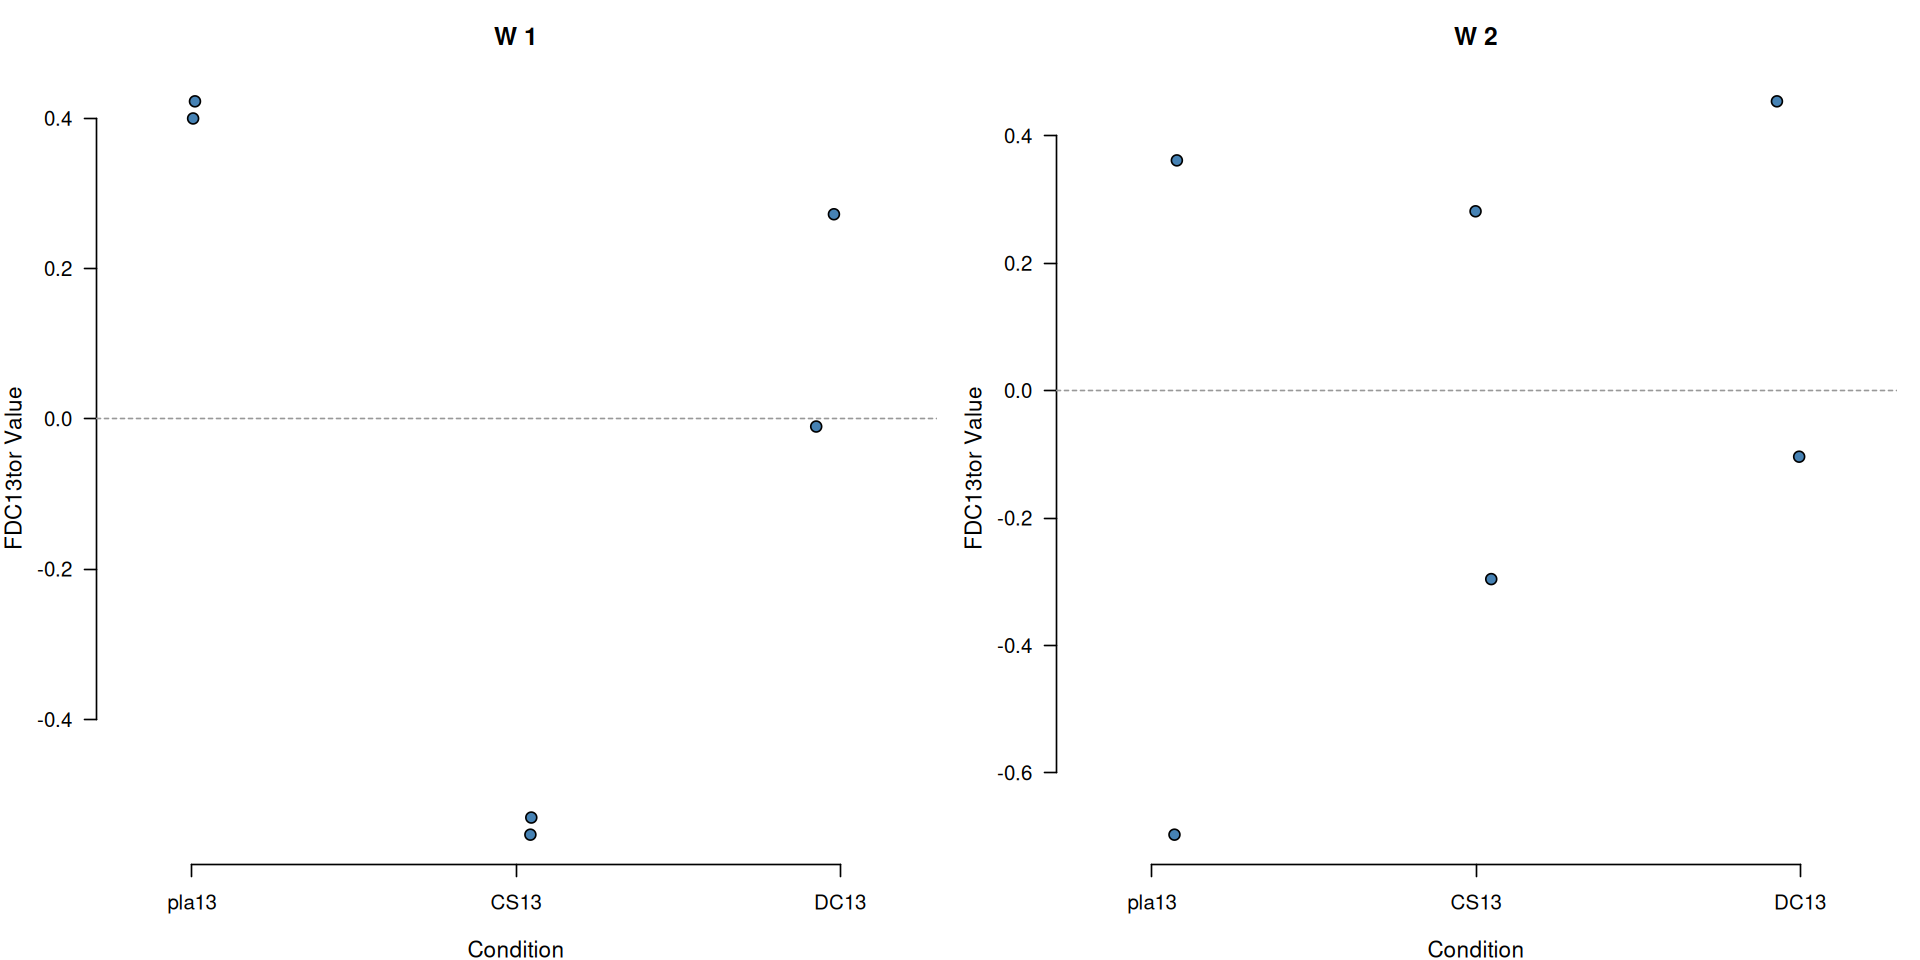

In [51]:
# Set layout to 1 row, 2 columns (side by side)
par(
  mfrow = c(1, 2),
  mar = c(4, 4, 3, 1),   # margins: bottom, left, top, right
  cex.main = 1.2,        # title size
  cex.axis = 1.0,        # axis tick label size
  cex.lab = 1.1,         # axis title size
  las = 1                # horizontal y-axis labels
)

# Loop over W1 and W2
for (i in 1:2) {
  stripchart(
    pData(set)[, i] ~ dds$condition,
    vertical = TRUE,
    method = "jitter",
    pch = 21,
    bg = "steelblue",
    col = "black",
    frame.plot = FALSE,
    main = paste("W", i),
    ylab = "FDC13tor Value",
    xlab = "Condition",
    cex = 1.1
  )
  abline(h = 0, lty = 2, col = "gray60", lwd = 1)
}


using ntop=500 top features by variance

using ntop=500 top features by variance



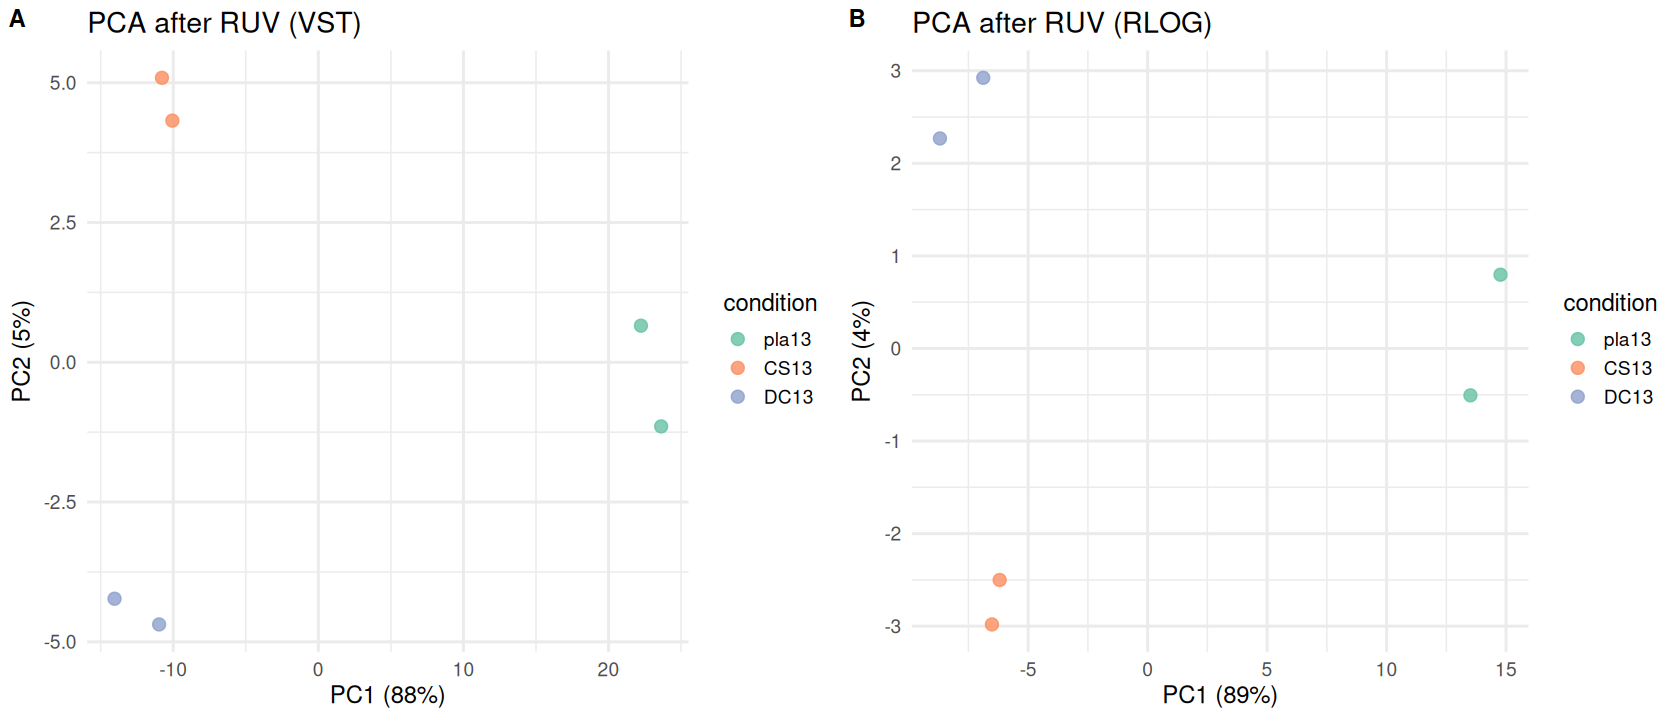

In [52]:
# Transform count data from ddsruv
vsd3 <- vst(ddsruv, blind = TRUE)
rld3 <- rlog(ddsruv, blind = TRUE)

# Get PCA data
pca_vsd <- plotPCA(vsd3, intgroup = "condition", returnData = TRUE)
pca_rld <- plotPCA(rld3, intgroup = "condition", returnData = TRUE)

# Variance explained
percentVar_vsd <- round(100 * attr(pca_vsd, "percentVar"))
percentVar_rld <- round(100 * attr(pca_rld, "percentVar"))

# PCA plot for VST
p1 <- ggplot(pca_vsd, aes(PC1, PC2, color = condition)) +
  geom_point(size = 3, alpha = 0.8) +
  labs(
    title = "PCA after RUV (VST)",
    x = paste0("PC1 (", percentVar_vsd[1], "%)"),
    y = paste0("PC2 (", percentVar_vsd[2], "%)")
  ) +
  theme_minimal(base_size = 14) +
  scale_color_brewer(palette = "Set2") +
  theme(legend.position = "right")

# PCA plot for RLOG
p2 <- ggplot(pca_rld, aes(PC1, PC2, color = condition)) +
  geom_point(size = 3, alpha = 0.8) +
  labs(
    title = "PCA after RUV (RLOG)",
    x = paste0("PC1 (", percentVar_rld[1], "%)"),
    y = paste0("PC2 (", percentVar_rld[2], "%)")
  ) +
  theme_minimal(base_size = 14) +
  scale_color_brewer(palette = "Set2") +
  theme(legend.position = "right")

# Show both plots side by side with legends
options(repr.plot.width = 14, repr.plot.height = 6)
plot_grid(p1, p2, labels = c("A", "B"), ncol = 2)

Warning message:
"ggrepel: 1478 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


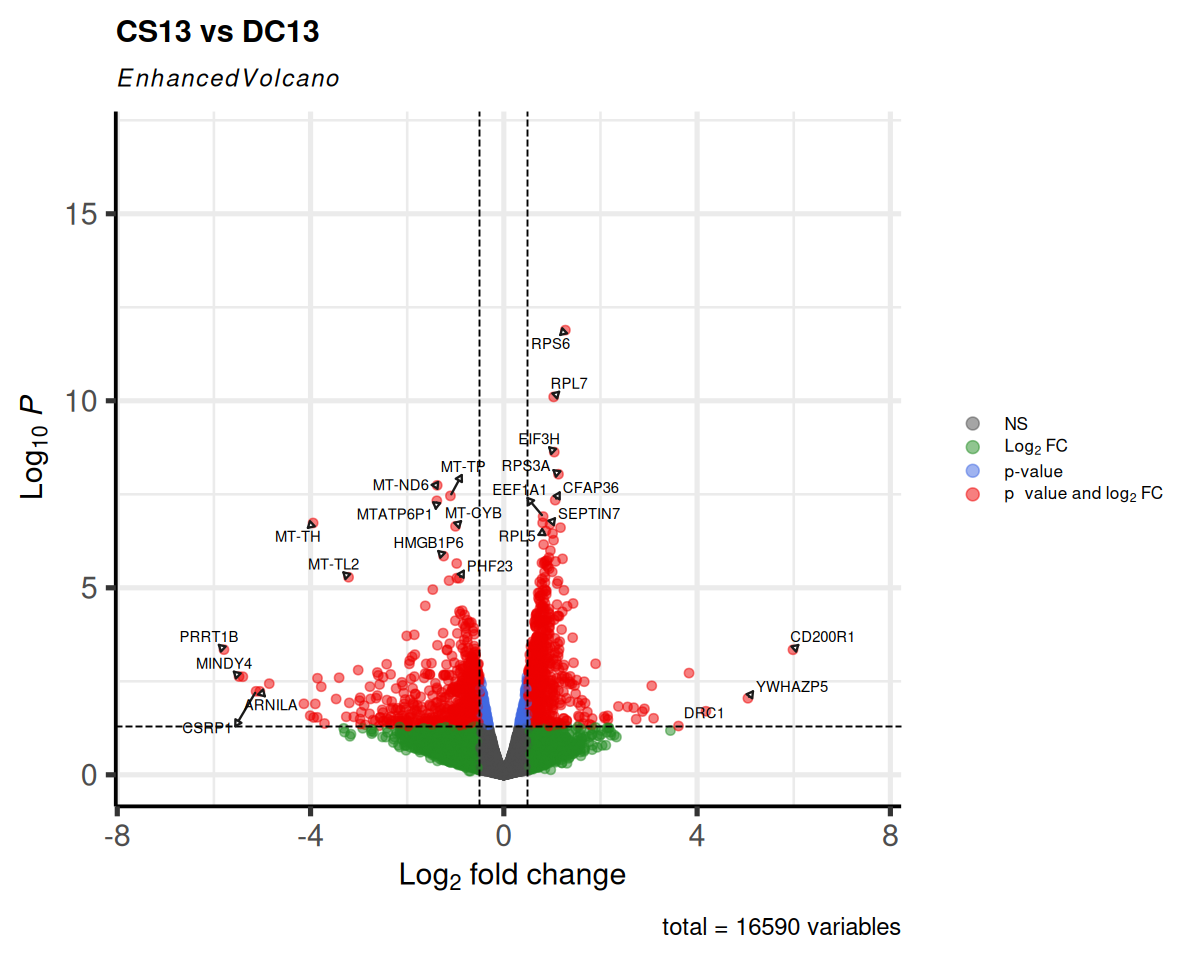

In [53]:
library(EnhancedVolcano)

# Color	Label in legend	Meaning
# Grey	NS	Not Significant – the gene did not pass the p-value or log₂FC thresholds
# Green	Log₂ FC	The gene passed the log₂ fold change cutoff but not the p-value cutoff
# Blue	p-value	The gene passed the p-value cutoff but not the log₂FC cutoff
# Red	p value and log₂ FC	The gene passed both p-value and log₂FC thresholds — most interesting hits

# Define thresholds
pval_cutoff <- 0.05
lfc_cutoff <- 0.5

# Set up the plotting window size for a more compDC13t layout
options(repr.plot.width = 10, repr.plot.height = 8)

EnhancedVolcano(res_CS13_vs_DC13,
                lab = rownames(res_CS13_vs_DC13),
                x = 'log2FoldChange',
                y = 'pvalue',
                pCutoff = pval_cutoff,
                FCcutoff = lfc_cutoff,
                title = 'CS13 vs DC13',
                pointSize = 2.0,
                labSize = 3.0,
                legendPosition = 'right',
                legendLabSize = 10,
                legendIconSize = 3.0,
                drawConnectors = TRUE,
                widthConnectors = 0.5,
                boxedLabels = FALSE)


In [54]:
library(clusterProfiler)
library(org.Hs.eg.db) 
library(GO.db)         
library(DO.db)         
library(KEGGREST)      
library(ReactomePA)    
library(enrichplot)    
library(dplyr)
library(msigdbr)
library(msigdb)
library(msigdf)
library(msigdbdf)

clusterProfiler v4.14.6 Learn more at https://yulab-smu.top/contribution-knowledge-mining/

Please cite:

S Xu, E Hu, Y Cai, Z Xie, X Luo, L Zhan, W Tang, Q Wang, B Liu, R Wang,
W Xie, T Wu, L Xie, G Yu. Using clusterProfiler to characterize
multiomics data. Nature Protocols. 2024, 19(11):3292-3320


Attaching package: 'clusterProfiler'


The following objects are masked from 'package:ensembldb':

    filter, select


The following object is masked from 'package:biomaRt':

    select


The following object is masked from 'package:AnnotationDbi':

    select


The following object is masked from 'package:XVector':

    slice


The following object is masked from 'package:purrr':

    simplify


The following object is masked from 'package:IRanges':

    slice


The following object is masked from 'package:S4Vectors':

    rename


The following object is masked from 'package:stats':

    filter


ReactomePA v1.50.0 Learn more at https://yulab-smu.top/contribution-knowledge-mining/

Plea

In [55]:
# Define thresholds
pval_cutoff <- 0.05
lfc_cutoff <- 0.5
fin_name = "A2780.transcripts.IP.RNA.samples"

In [56]:
res <- res_CS13_vs_DC13  

head(res,3)
dim(res)

log2 fold change (MLE): condition CS13 vs DC13 
Wald test p-value: condition CS13 vs DC13 
DataFrame with 3 rows and 6 columns
        baseMean log2FoldChange     lfcSE      stat     pvalue      padj
       <numeric>      <numeric> <numeric> <numeric>  <numeric> <numeric>
TSPAN6   571.608      0.2330467  0.218432  1.066909 0.28601301 0.6674080
DPM1     465.972      0.6260522  0.205091  3.052564 0.00226895 0.0707365
SCYL3    187.245      0.0389166  0.298749  0.130265 0.89635669 0.9720938

[1] 16590     6

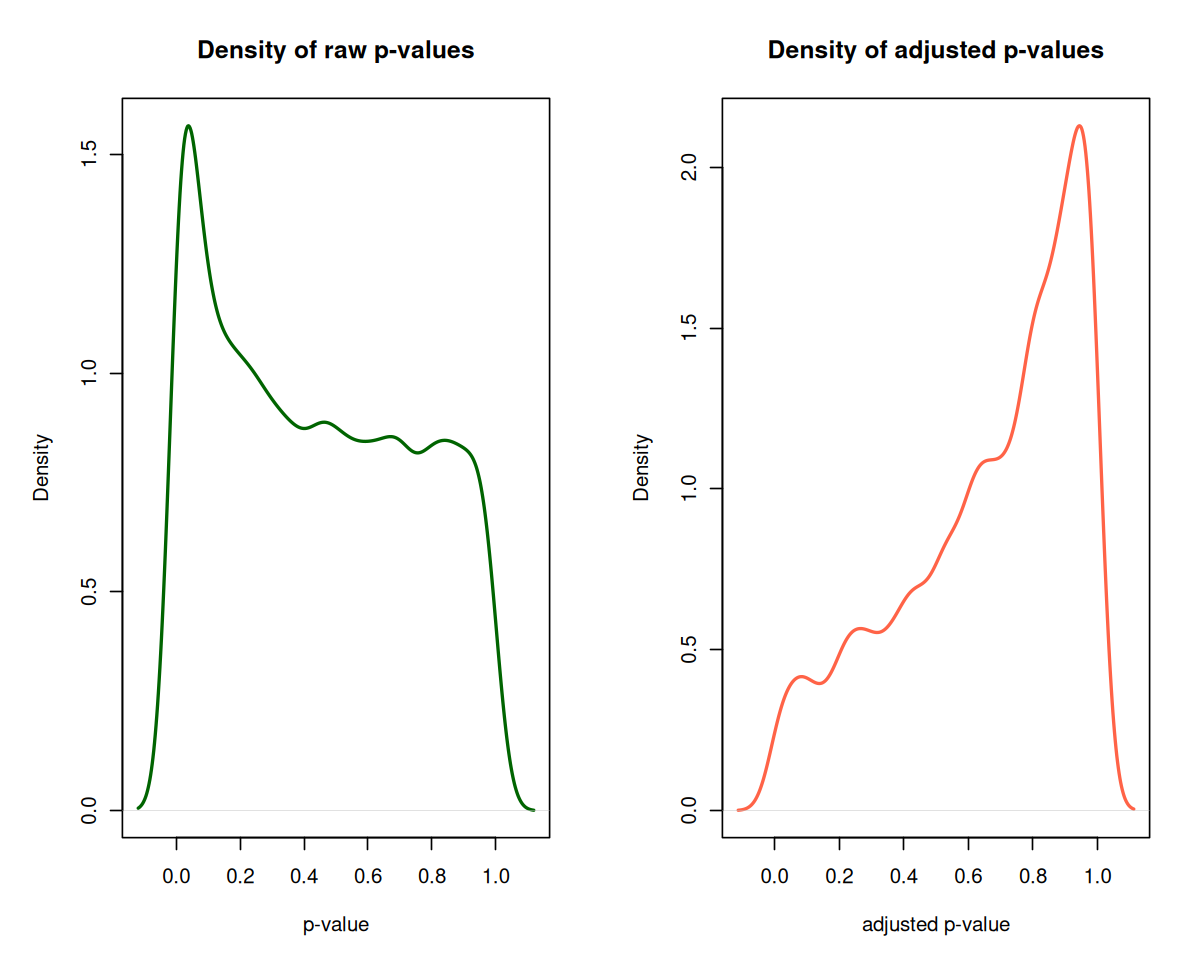

In [57]:
# Filter out NA values
pvals <- res$pvalue[!is.na(res$pvalue)]
padj_vals <- res$padj[!is.na(res$padj)]

# Set layout: 1 row, 2 columns
par(mfrow = c(1, 2),            # 1 row, 2 columns
    mar = c(5, 5, 4, 2) + 0.1)  # margins: bottom, left, top, right

# Plot density of raw p-values
plot(density(pvals),
     main = "Density of raw p-values",
     xlab = "p-value",
     lwd = 2,
     col = "darkgreen")

# Plot density of adjusted p-values
plot(density(padj_vals),
     main = "Density of adjusted p-values",
     xlab = "adjusted p-value",
     lwd = 2,
     col = "tomato")

In [58]:
# Step 1: Convert rownames to a column
res_sig <- as.data.frame(res) %>%
  rownames_to_column("gene") %>%
  filter(padj < pval_cutoff & abs(log2FoldChange) > lfc_cutoff)

# Step 2: MCS13 SYMBOL to ENTREZID
gene_ids <- bitr(
  res_sig$gene,
  fromType = "SYMBOL",
  toType   = "ENTREZID",
  OrgDb    = org.Hs.eg.db
)

# Step 3: Merge bDC13k into results
res_merge <- merge(res_sig, gene_ids, by.x = "gene", by.y = "SYMBOL")
res_merge <- res_merge[!duplicated(res_merge$ENTREZID), ]

# Step 4: Prepare gene list for GSEA
gene_list2 <- setNames(res_merge$log2FoldChange, res_merge$ENTREZID)
gene_list2 <- sort(gene_list2, decreasing = TRUE)

# Step 5: Check
head(gene_list2, 3)
length(gene_list2)

'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(res_sig$gene, fromType = "SYMBOL", toType = "ENTREZID", :
"1.38% of input gene IDs are fail to map..."


26974     3161   144581 
1.443440 1.433541 1.424928

[1] 285

using 'fgsea' for GSEA analysis, please cite Korotkevich et al (2019).


preparing geneSet collections...

GSEA analysis...

no term enriched under specific pvalueCutoff...



No enriched terms in GSEA under pvalueCutoff.


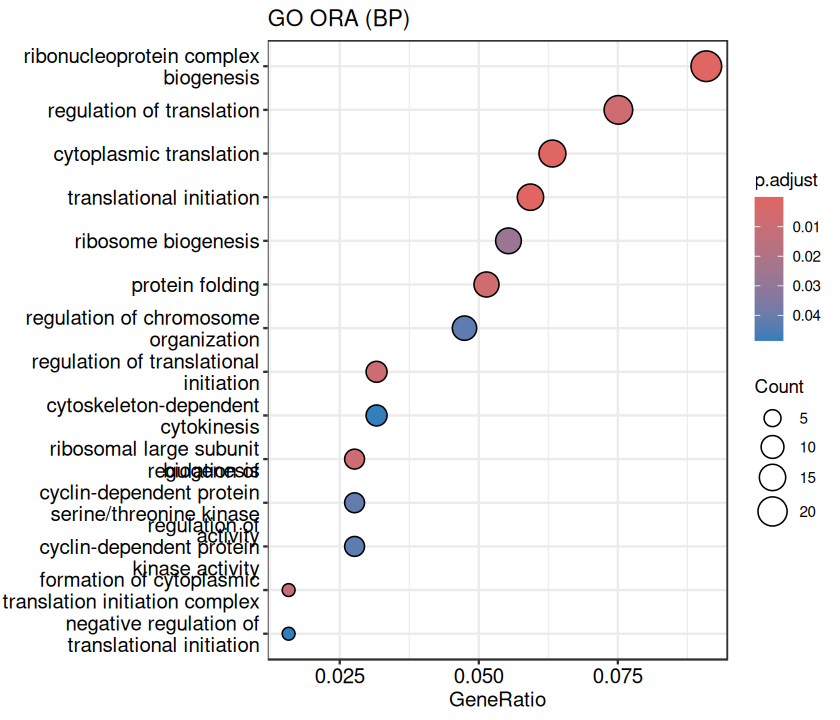

In [59]:
library(clusterProfiler)
library(org.Hs.eg.db)
library(cowplot)

# Predefine result objects to DC13oid "not found" error
result <- NULL
result2 <- NULL

# GO Over-Representation Analysis (ORA)
result <- tryCatch({
  ego <- enrichGO(gene          = gene_ids$ENTREZID,
                  OrgDb         = org.Hs.eg.db,
                  ont           = "BP",
                  keyType       = "ENTREZID",  
                  pAdjustMethod = "BH",
                  pvalueCutoff  = 0.05,
                  qvalueCutoff  = 1,
                  readable      = TRUE)
  
  # SDC13e results
  write.table(ego@result, file = paste0(fin_name, "_GO_OverRepresentation_Results.txt"), 
              row.names = FALSE, col.names = TRUE, quote = FALSE)

  # SDC13e PNG
  png(paste0(fin_name, "_GO_OverRepresentation.png"), width = 1000, height = 800)
  print(dotplot(ego, showCategory = 20, title = "GO ORA (BP)"))
  dev.off()

  # Return ggplot object
  dotplot(ego, showCategory = 20, title = "GO ORA (BP)")

}, error = function(e) {
  cat("Error in GO ORA:", conditionMessage(e), "\n")
  NULL
})


# GO Enrichment Analysis (GSEA)
result2 <- tryCatch({
  ego2 <- gseGO(gene          = gene_list2,
                OrgDb         = org.Hs.eg.db,
                keyType       = "ENTREZID",  
                ont           = "BP",
                pAdjustMethod = "BH",
                pvalueCutoff  = 0.05)

  if (nrow(ego2@result) > 0) {
    write.table(ego2@result, file = paste0(fin_name, "_GO_Enrichment_Results.txt"), 
                row.names = FALSE, col.names = TRUE, quote = FALSE)

    png(paste0(fin_name, "_GO_Enrichment_Plot.png"), width = 1000, height = 800)
    print(dotplot(ego2, showCategory = 20, title = "GO GSEA (BP)"))
    dev.off()

    dotplot(ego2, showCategory = 20, title = "GO GSEA (BP)")
  } else {
    cat("No enriched terms in GSEA under pvalueCutoff.\n")
    NULL
  }

}, error = function(e) {
  cat("Error in GO GSEA:", conditionMessage(e), "\n")
  NULL
})

# === Display plots side by side if both exist ===
options(repr.plot.width = 16, repr.plot.height = 8)

if (!is.null(result) && !is.null(result2)) {
  plot_grid(result, result2, labels = c("A", "B"), ncol = 2, rel_widths = c(1, 1))
} else if (!is.null(result)) {
  options(repr.plot.width = 7, repr.plot.height = 6)
  print(result)
} else if (!is.null(result2)) {
  options(repr.plot.width = 7, repr.plot.height = 6)
  print(result2)
} else {
  cat("No enrichment plots to display.\n")
}


Reading KEGG annotation online: "https://rest.kegg.jp/link/hsa/pathway"...

Reading KEGG annotation online: "https://rest.kegg.jp/list/pathway/hsa"...

no term enriched under specific pvalueCutoff...



⚠️ No enriched KEGG terms found in GSEA.


NULL

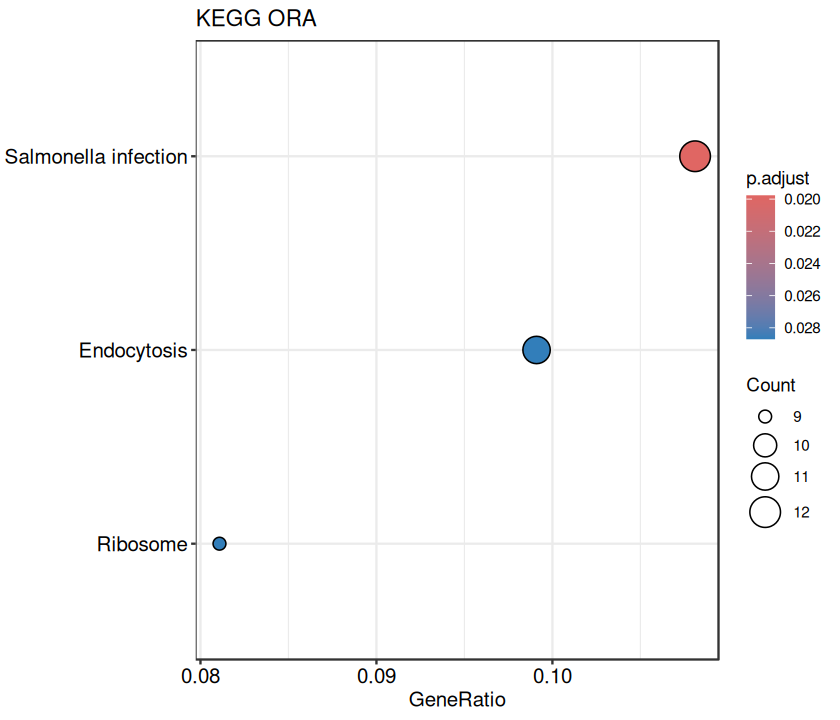

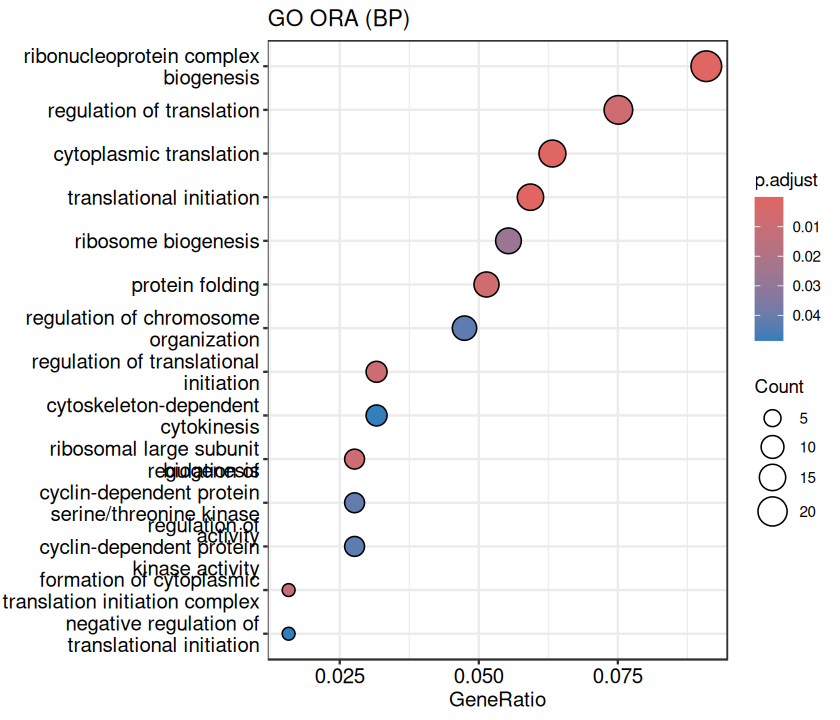

In [60]:
# === KEGG Over-Representation Analysis (ORA) ===
result <- tryCatch({

  kegg_enrich <- enrichKEGG(
    gene           = gene_ids$ENTREZID,
    organism       = "hsa",
    pAdjustMethod  = "BH",
    pvalueCutoff   = 0.05
  )

  if (!is.null(kegg_enrich) && nrow(kegg_enrich@result) > 0) {

    # SDC13e results
    write.table(kegg_enrich@result,
                file = paste0(fin_name, "_KEGG_OverRepresentation_Results.txt"),
                sep = "\t", row.names = FALSE, quote = FALSE)

    # SDC13e PNG plot
    png(paste0(fin_name, "_KEGG_OverRepresentation_Plot.png"), width = 1000, height = 800)
    print(dotplot(kegg_enrich, showCategory = 20, title = "KEGG ORA"))
    dev.off()

    # Return plot object
    return(dotplot(kegg_enrich, showCategory = 20, title = "KEGG ORA"))

  } else {
    cat("⚠️ No enriched KEGG terms found in ORA.\n")
    return(NULL)
  }

}, error = function(e) {
  cat("❌ Error in KEGG ORA:", conditionMessage(e), "\n")
  return(NULL)
})



# === KEGG Gene Set Enrichment Analysis (GSEA) ===
result2 <- tryCatch({

  kegg_gse <- gseKEGG(
    geneList      = gene_list2,
    organism      = "hsa",
    minGSSize     = 120,
    pvalueCutoff  = 0.05,
    verbose       = FALSE
  )

  if (!is.null(kegg_gse) && nrow(kegg_gse@result) > 0) {

    # SDC13e results
    write.table(kegg_gse@result,
                file = paste0(fin_name, "_KEGG_Enrichment_Results.txt"),
                sep = "\t", row.names = FALSE, quote = FALSE)

    # SDC13e PNG plot
    png(paste0(fin_name, "_KEGG_Enrichment_Plot.png"), width = 1000, height = 800)
    print(dotplot(kegg_gse, showCategory = 20, title = "KEGG GSEA"))
    dev.off()

    # Return plot object
    return(dotplot(kegg_gse, showCategory = 20, title = "KEGG GSEA"))

  } else {
    cat("⚠️ No enriched KEGG terms found in GSEA.\n")
    return(NULL)
  }

}, error = function(e) {
  cat("❌ Error in KEGG GSEA:", conditionMessage(e), "\n")
  return(NULL)
})



# === Display Plots Nicely ===
# Set default figure size
options(repr.plot.width = 6, repr.plot.height = 6)

if (!is.null(result) && !is.null(result2)) {
  # Side-by-side
  options(repr.plot.width = 12, repr.plot.height = 6)
  plot_grid(result, result2, labels = c("A", "B"), ncol = 2, rel_widths = c(1, 1))

} else if (!is.null(result)) {
  options(repr.plot.width = 7, repr.plot.height = 6)
  print(result)

} else if (!is.null(result2)) {
  options(repr.plot.width = 7, repr.plot.height = 6)
  print(result2)

} else {
  cat("⚠️ No KEGG enrichment plots to display.\n")
}


##############################################################################
Pathview is an open source software package distributed under GNU General
Public License version 3 (GPLv3). Details of GPLv3 is available at
http://www.gnu.org/licenses/gpl-3.0.html. Particullary, users are required to
formally cite the original Pathview paper (not just mention it) in publications
or products. For details, do citation("pathview") within R.

The pathview downloads and uses KEGG data. Non-academic uses may require a KEGG
license agreement (details at http://www.kegg.jp/kegg/legal.html).
##############################################################################

DOSE v4.0.0 Learn more at https://yulab-smu.top/contribution-knowledge-mining/

Please cite:

Guangchuang Yu, Li-Gen Wang, Guang-Rong Yan, Qing-Yu He. DOSE: an
R/Bioconductor package for Disease Ontology Semantic and Enrichment
analysis. Bioinformatics. 2015, 31(4):608-609


Attaching package: 'rWikiPathways'


The following object 

⚠️ No enriched WikiPathways terms found in ORA.


NULL

using 'fgsea' for GSEA analysis, please cite Korotkevich et al (2019).


preparing geneSet collections...

--> Expected input gene ID: 

--> No gene can be mapped....



❌ Error in WikiPathways GSEA: 'organism' is not a slot in class "NULL" 


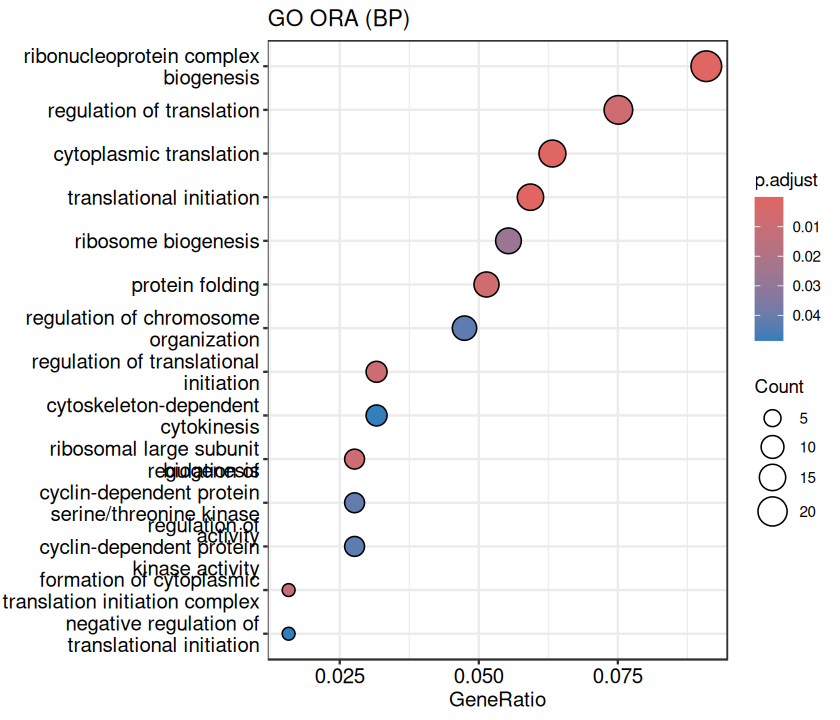

In [61]:
library(clusterProfiler)
library(enrichplot)
library(cowplot)
library(pathview)         # Optional for WikiPathways
library(dplyr)
library(DOSE)
library(rWikiPathways)

# === WikiPathways Over-Representation Analysis (ORA) ===
result <- tryCatch({

  wikipathways_enrich <- enrichWP(
    gene           = gene_ids$ENTREZID,
    organism       = "Homo sCS13iens",
    pvalueCutoff   = 0.05
  )

  if (!is.null(wikipathways_enrich) && nrow(wikipathways_enrich@result) > 0) {

    # SDC13e results
    write.table(wikipathways_enrich@result,
                file = paste0(fin_name, "_WikiPathways_ORA_Results.txt"),
                sep = "\t", row.names = FALSE, quote = FALSE)

    # SDC13e plot
    png(paste0(fin_name, "_WikiPathways_ORA_Plot.png"), width = 1000, height = 800)
    print(dotplot(wikipathways_enrich, showCategory = 20, title = "WikiPathways ORA"))
    dev.off()

    # Return plot object
    return(dotplot(wikipathways_enrich, showCategory = 20, title = "WikiPathways ORA"))

  } else {
    cat("⚠️ No enriched WikiPathways terms found in ORA.\n")
    return(NULL)
  }

}, error = function(e) {
  cat("❌ Error in WikiPathways ORA:", conditionMessage(e), "\n")
  return(NULL)
})



# === WikiPathways Gene Set Enrichment Analysis (GSEA) ===
result2 <- tryCatch({

  wikipathways_gse <- gseWP(
    gene          = gene_list2,
    organism      = "Homo sCS13iens",
    pvalueCutoff  = 0.05
  )

  if (!is.null(wikipathways_gse) && nrow(wikipathways_gse@result) > 0) {

    # SDC13e results
    write.table(wikipathways_gse@result,
                file = paste0(fin_name, "_WikiPathways_Enrichment_Results.txt"),
                sep = "\t", row.names = FALSE, quote = FALSE)

    # SDC13e plot
    png(paste0(fin_name, "_WikiPathways_Enrichment_Plot.png"), width = 1000, height = 800)
    print(dotplot(wikipathways_gse, showCategory = 20, title = "WikiPathways GSEA"))
    dev.off()

    # Return plot object
    return(dotplot(wikipathways_gse, showCategory = 20, title = "WikiPathways GSEA"))

  } else {
    cat("⚠️ No enriched WikiPathways terms found in GSEA.\n")
    return(NULL)
  }

}, error = function(e) {
  cat("❌ Error in WikiPathways GSEA:", conditionMessage(e), "\n")
  return(NULL)
})



# === Display plots ===
options(repr.plot.width = 5, repr.plot.height = 5)  # Default size

if (!is.null(result) && !is.null(result2)) {
  # Show both plots side-by-side
  options(repr.plot.width = 12, repr.plot.height = 6)
  plot_grid(result, result2, labels = c("A", "B"), ncol = 2, rel_widths = c(1, 1))

} else if (!is.null(result)) {
  options(repr.plot.width = 7, repr.plot.height = 6)
  print(result)

} else if (!is.null(result2)) {
  options(repr.plot.width = 7, repr.plot.height = 6)
  print(result2)

} else {
  cat("⚠️ No WikiPathways enrichment plots to display.\n")
}


using 'fgsea' for GSEA analysis, please cite Korotkevich et al (2019).


preparing geneSet collections...

GSEA analysis...

no term enriched under specific pvalueCutoff...



⚠️ No enriched Reactome terms found in GSEA.


NULL

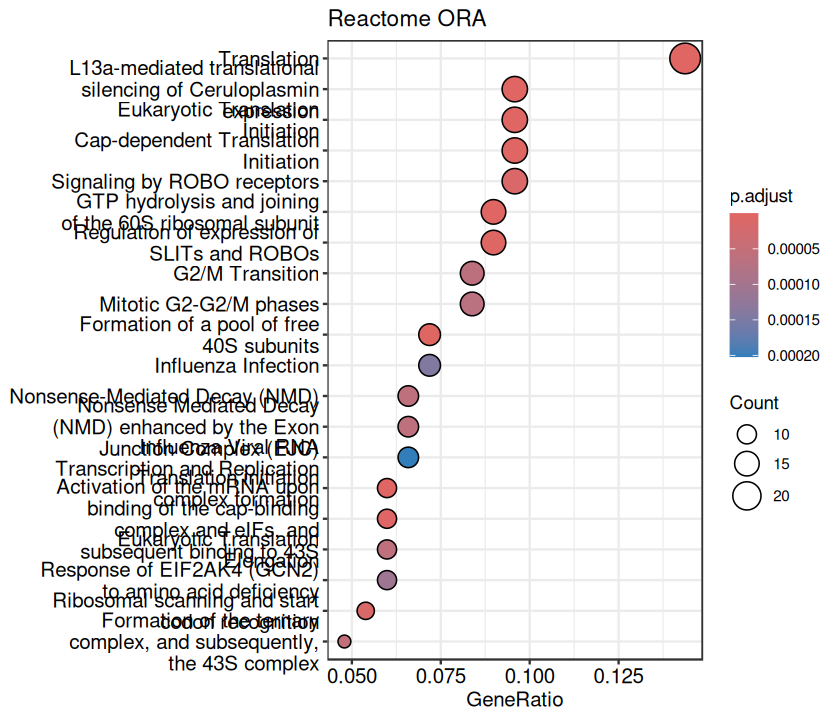

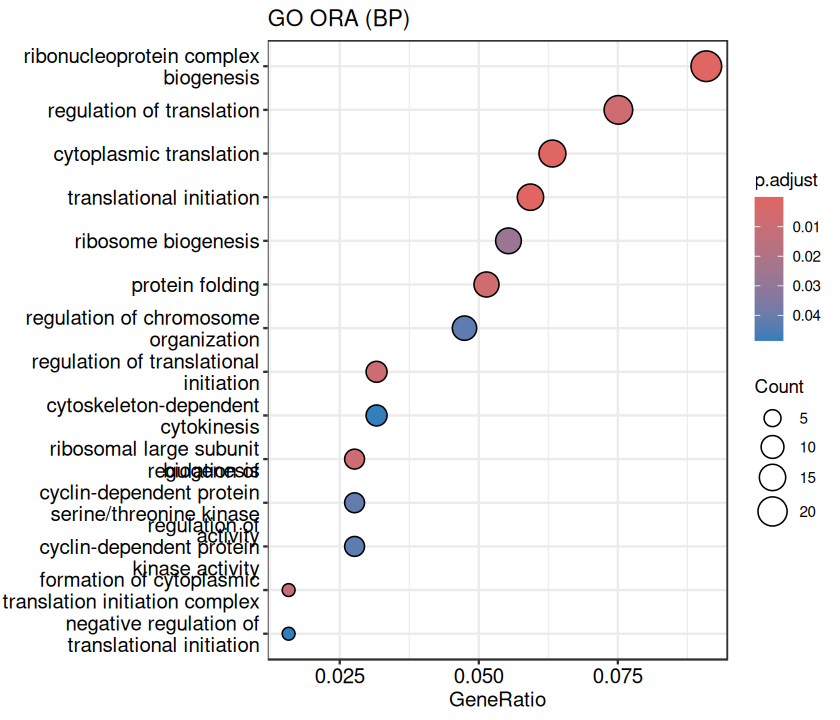

In [62]:
library(ReactomePA)
library(clusterProfiler)
library(enrichplot)
library(cowplot)

# === ReDC13tome Over-Representation Analysis (ORA) ===
result <- tryCatch({

  reactome_ora <- enrichPathway(
    gene           = gene_ids$ENTREZID,
    organism       = "human",
    pAdjustMethod  = "BH",
    pvalueCutoff   = 0.05
  )

  if (!is.null(reactome_ora) && nrow(reactome_ora@result) > 0) {

    # SDC13e results
    write.table(reactome_ora@result,
                file = paste0(fin_name, "_Reactome_ORA_Results.txt"),
                sep = "\t", row.names = FALSE, quote = FALSE)

    # SDC13e plot
    png(paste0(fin_name, "_Reactome_ORA_Plot.png"), width = 1000, height = 800)
    print(dotplot(reactome_ora, showCategory = 20, title = "Reactome ORA"))
    dev.off()

    # Return plot for screen
    return(dotplot(reactome_ora, showCategory = 20, title = "Reactome ORA"))

  } else {
    cat("⚠️ No enriched Reactome terms found in ORA.\n")
    return(NULL)
  }

}, error = function(e) {
  cat("❌ Error in Reactome ORA:", conditionMessage(e), "\n")
  return(NULL)
})


# === Reactome GSEA Analysis ===
result2 <- tryCatch({

  reactome_gsea <- gsePathway(
    gene            = gene_list2,
    organism        = "human",
    pAdjustMethod   = "BH",
    pvalueCutoff    = 0.05
  )

  if (!is.null(reactome_gsea) && nrow(reactome_gsea@result) > 0) {

    # SDC13e results
    write.table(reactome_gsea@result,
                file = paste0(fin_name, "_Reactome_Enrichment_Results.txt"),
                sep = "\t", row.names = FALSE, quote = FALSE)

    # SDC13e plot
    png(paste0(fin_name, "_Reactome_Enrichment_Plot.png"), width = 1000, height = 800)
    print(dotplot(reactome_gsea, showCategory = 20, title = "Reactome GSEA"))
    dev.off()

    # Return plot for screen
    return(dotplot(reactome_gsea, showCategory = 20, title = "Reactome GSEA"))

  } else {
    cat("⚠️ No enriched Reactome terms found in GSEA.\n")
    return(NULL)
  }

}, error = function(e) {
  cat("❌ Error in Reactome GSEA:", conditionMessage(e), "\n")
  return(NULL)
})


# === Display plots ===
options(repr.plot.width = 6, repr.plot.height = 6)

if (!is.null(result) && !is.null(result2)) {
  # Show both side-by-side
  options(repr.plot.width = 12, repr.plot.height = 6)
  plot_grid(result, result2, labels = c("A", "B"), ncol = 2, rel_widths = c(1, 1))

} else if (!is.null(result)) {
  options(repr.plot.width = 7, repr.plot.height = 6)
  print(result)

} else if (!is.null(result2)) {
  options(repr.plot.width = 7, repr.plot.height = 6)
  print(result2)

} else {
  cat("⚠️ No Reactome enrichment plots to display.\n")
}


Warning message:
"The `category` argument of `msigdbr()` is deprecated as of msigdbr 9.0.0.
ℹ Please use the `collection` argument instead."
using 'fgsea' for GSEA analysis, please cite Korotkevich et al (2019).


preparing geneSet collections...

GSEA analysis...

no term enriched under specific pvalueCutoff...



⚠️ No significant MSigDB GSEA pathways found.


NULL

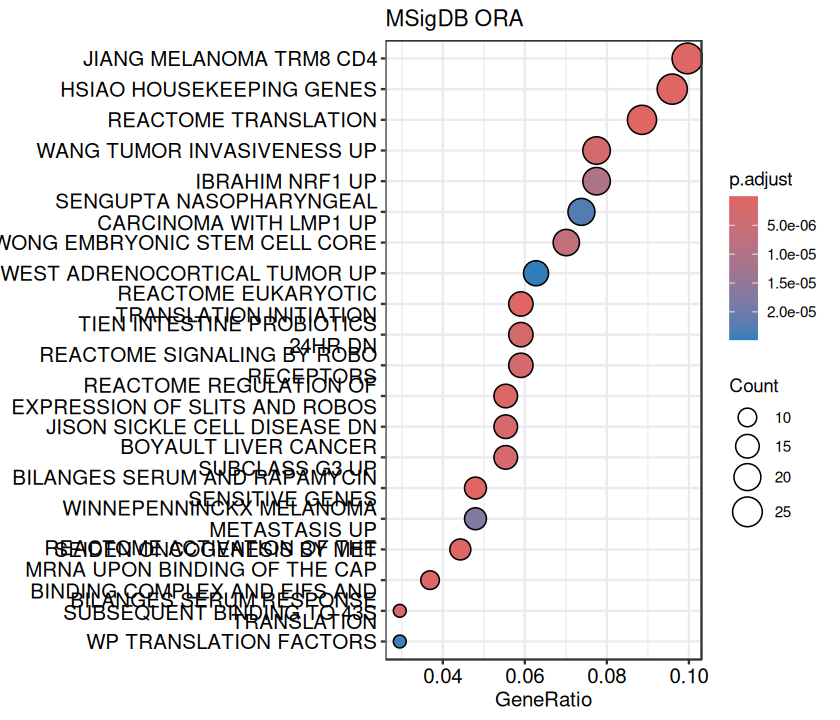

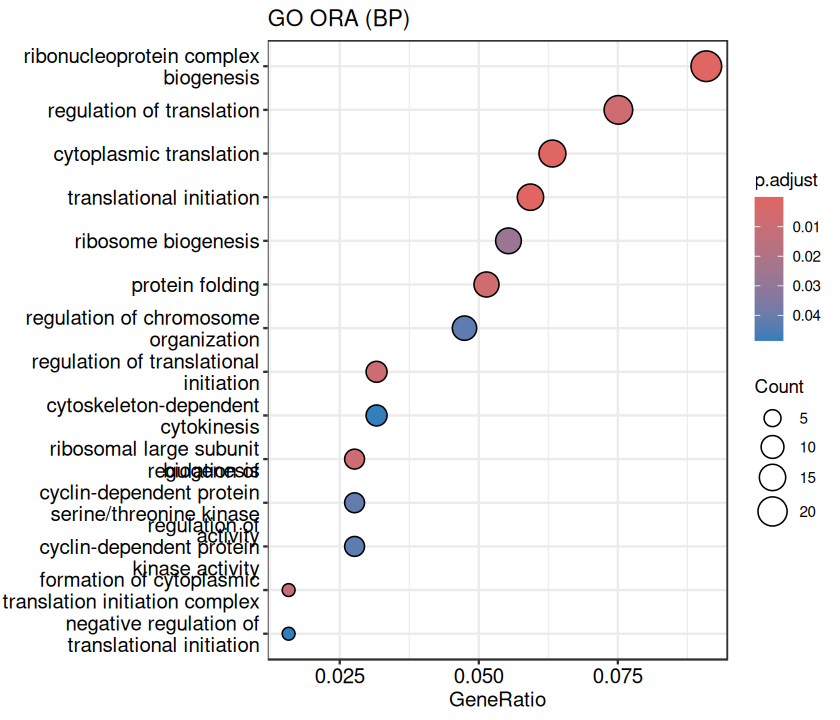

In [63]:
library(msigdbr)
library(clusterProfiler)
library(enrichplot)
library(cowplot)
library(dplyr)

# === Prepare MSigDB C2 gene sets ===
msig_genesets <- msigdbr(species = "Homo sapiens", category = "C2")
C2_t2g <- msig_genesets %>% dplyr::select(gs_name, entrez_gene)

# Use gene_ids$ENTREZID for ORA, and named gene_list2 for GSEA
gene_list <- gene_ids$ENTREZID  # for ORA

# === MSigDB Over-Representation Analysis (ORA) ===
result <- tryCatch({

  msig_enrich <- enricher(
    gene       = gene_list,
    TERM2GENE  = C2_t2g
  )

  if (!is.null(msig_enrich) && nrow(msig_enrich@result) > 0) {

    write.table(msig_enrich@result,
                file = paste0(fin_name, "_MSigDB_OverRepresentation_Results.txt"),
                sep = "\t", row.names = FALSE, quote = FALSE)

    png(paste0(fin_name, "_MSigDB_ORA_Plot.png"), width = 1000, height = 800)
    print(dotplot(msig_enrich, showCategory = 20, title = "MSigDB ORA"))
    dev.off()

    return(dotplot(msig_enrich, showCategory = 20, title = "MSigDB ORA"))

  } else {
    cat("⚠️ No significant MSigDB pathways found in ORA.\n")
    return(NULL)
  }

}, error = function(e) {
  cat("❌ Error in MSigDB ORA:", conditionMessage(e), "\n")
  return(NULL)
})


# === MSigDB Gene Set Enrichment Analysis (GSEA) ===
result2 <- tryCatch({

  msig_gsea <- GSEA(
    geneList   = gene_list2,
    TERM2GENE  = C2_t2g,
    pvalueCutoff = 0.05
  )

  if (!is.null(msig_gsea) && nrow(msig_gsea@result) > 0) {

    write.table(msig_gsea@result,
                file = paste0(fin_name, "_MSigDB_GSEA_Results.txt"),
                sep = "\t", row.names = FALSE, quote = FALSE)

    png(paste0(fin_name, "_MSigDB_GSEA_Plot.png"), width = 1000, height = 800)
    print(dotplot(msig_gsea, showCategory = 20, title = "MSigDB GSEA"))
    dev.off()

    return(dotplot(msig_gsea, showCategory = 20, title = "MSigDB GSEA"))

  } else {
    cat("⚠️ No significant MSigDB GSEA pathways found.\n")
    return(NULL)
  }

}, error = function(e) {
  cat("❌ Error in MSigDB GSEA:", conditionMessage(e), "\n")
  return(NULL)
})


# === Display plots ===
options(repr.plot.width = 20, repr.plot.height = 20)

if (!is.null(result) && !is.null(result2)) {
  options(repr.plot.width = 12, repr.plot.height = 6)
  plot_grid(result, result2, labels = c("A", "B"), ncol = 2, rel_widths = c(1, 1))

} else if (!is.null(result)) {
  options(repr.plot.width = 7, repr.plot.height = 6)
  print(result)

} else if (!is.null(result2)) {
  options(repr.plot.width = 7, repr.plot.height = 6)
  print(result2)

} else {
  cat("⚠️ No MSigDB enrichment plots to display.\n")
}


using 'fgsea' for GSEA analysis, please cite Korotkevich et al (2019).


preparing geneSet collections...

GSEA analysis...

no term enriched under specific pvalueCutoff...



⚠️ No significant MSigDB GSEA pathways found.


NULL

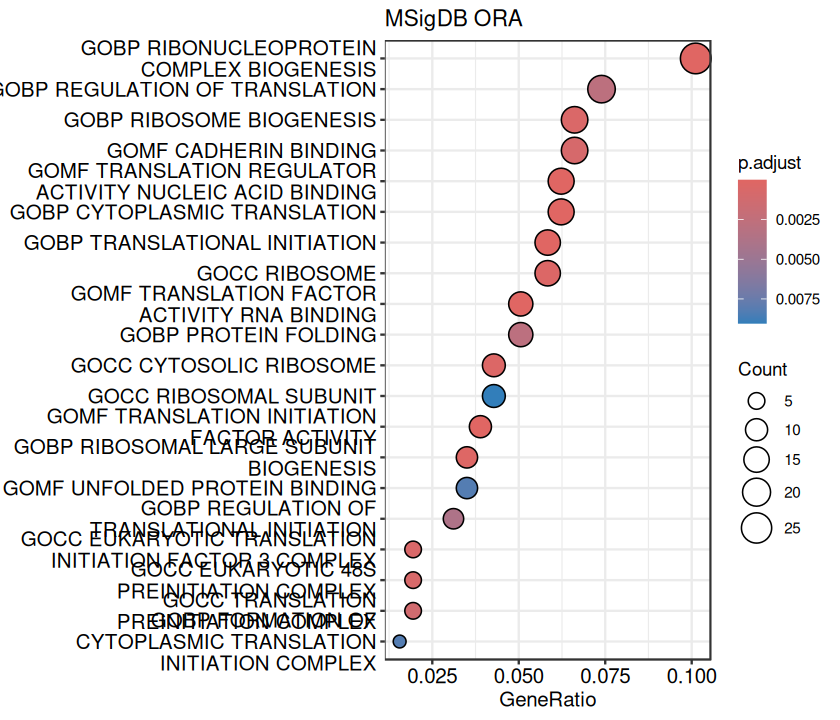

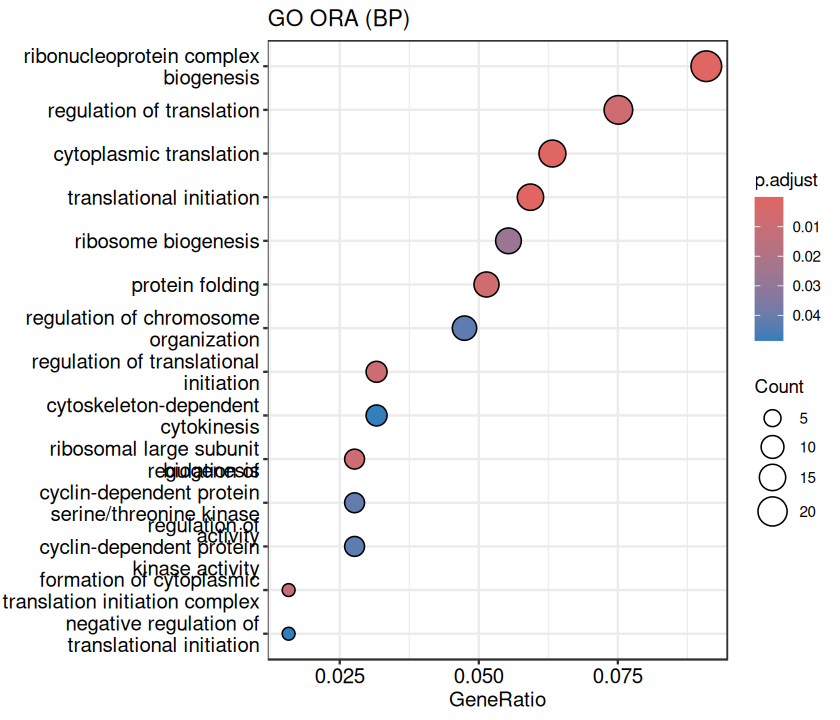

In [64]:
library(msigdbr)
library(clusterProfiler)
library(enrichplot)
library(cowplot)
library(dplyr)

# === Prepare MSigDB C2 gene sets ===
msig_genesets <- msigdbr(species = "Homo sapiens", category = "C5")
C2_t2g <- msig_genesets %>% dplyr::select(gs_name, entrez_gene)

# Use gene_ids$ENTREZID for ORA, and named gene_list2 for GSEA
gene_list <- gene_ids$ENTREZID  # for ORA

# === MSigDB Over-Representation Analysis (ORA) ===
result <- tryCatch({

  msig_enrich <- enricher(
    gene       = gene_list,
    TERM2GENE  = C2_t2g
  )

  if (!is.null(msig_enrich) && nrow(msig_enrich@result) > 0) {

    write.table(msig_enrich@result,
                file = paste0(fin_name, "_MSigDB_OverRepresentation_Results.txt"),
                sep = "\t", row.names = FALSE, quote = FALSE)

    png(paste0(fin_name, "_MSigDB_ORA_Plot.png"), width = 1000, height = 800)
    print(dotplot(msig_enrich, showCategory = 20, title = "MSigDB ORA"))
    dev.off()

    return(dotplot(msig_enrich, showCategory = 20, title = "MSigDB ORA"))

  } else {
    cat("⚠️ No significant MSigDB pathways found in ORA.\n")
    return(NULL)
  }

}, error = function(e) {
  cat("❌ Error in MSigDB ORA:", conditionMessage(e), "\n")
  return(NULL)
})


# === MSigDB Gene Set Enrichment Analysis (GSEA) ===
result2 <- tryCatch({

  msig_gsea <- GSEA(
    geneList   = gene_list2,
    TERM2GENE  = C2_t2g,
    pvalueCutoff = 0.05
  )

  if (!is.null(msig_gsea) && nrow(msig_gsea@result) > 0) {

    write.table(msig_gsea@result,
                file = paste0(fin_name, "_MSigDB_GSEA_Results.txt"),
                sep = "\t", row.names = FALSE, quote = FALSE)

    png(paste0(fin_name, "_MSigDB_GSEA_Plot.png"), width = 1000, height = 800)
    print(dotplot(msig_gsea, showCategory = 20, title = "MSigDB GSEA"))
    dev.off()

    return(dotplot(msig_gsea, showCategory = 20, title = "MSigDB GSEA"))

  } else {
    cat("⚠️ No significant MSigDB GSEA pathways found.\n")
    return(NULL)
  }

}, error = function(e) {
  cat("❌ Error in MSigDB GSEA:", conditionMessage(e), "\n")
  return(NULL)
})


# === Display plots ===
options(repr.plot.width = 10, repr.plot.height = 10)

if (!is.null(result) && !is.null(result2)) {
  options(repr.plot.width = 12, repr.plot.height = 6)
  plot_grid(result, result2, labels = c("A", "B"), ncol = 2, rel_widths = c(1, 1))

} else if (!is.null(result)) {
  options(repr.plot.width = 7, repr.plot.height = 6)
  print(result)

} else if (!is.null(result2)) {
  options(repr.plot.width = 7, repr.plot.height = 6)
  print(result2)

} else {
  cat("⚠️ No MSigDB enrichment plots to display.\n")
}
